# Giới thiệu

---

Báo cáo Trực quan hóa dữ liệu: Phân tích dữ liệu dân số và quyền sở hữu chó và mèo theo hộ gia đình được chia theo tiểu bang tại Mỹ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from datetime import datetime

In [ ]:
pip install pandas openpyxl

# 1. Phân tích dữ liệu

In [ ]:
import pandas as pd

# Đường dẫn đến file Excel trên GitHub (URL RAW)
url = "https://github.com/iamhuonggiang08/DataVisualization_N07_Group5/raw/main/catsvdogs.xlsx"

# Đọc file Excel từ URL
df = pd.read_excel(url, engine='openpyxl')

# Hiển thị DataFrame như một bảng trực quan trong Jupyter Notebook hoặc IPython
df

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
6,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
7,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
8,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162


**Phân tích cấu trúc dữ liệu:**
- Location: Địa điểm cụ thể, có thể là các bang hoặc khu vực.
- Number of Households (in 1000): Tổng số hộ gia đình trong từng bang, tính theo đơn vị hàng nghìn.
- Percentage of households with pets: Tỷ lệ phần trăm các hộ gia đình trong bang có ít nhất một thú cưng.
- Number of Pet Households (in 1000): Số lượng hộ gia đình có thú cưng trong từng bang, tính theo đơn vị hàng nghìn.
- Percentage of Dog Owners: Tỷ lệ phần trăm các hộ gia đình trong bang sở hữu ít nhất một con chó.
- Dog Owning Households (1000s): Số lượng hộ gia đình sở hữu chó trong từng bang, tính theo đơn vị hàng nghìn.
- Mean Number of Dogs per household: Số lượng chó trung bình trong mỗi hộ gia đình sở hữu chó.
- Dog Population (in 1000): Tổng số chó trong từng bang, tính theo đơn vị hàng nghìn.
- Percentage of Cat Owners: Tỷ lệ phần trăm các hộ gia đình trong bang sở hữu ít nhất một con mèo.
- Cat Owning Households: Số lượng hộ gia đình sở hữu mèo trong từng bang, tính theo đơn vị hàng nghìn.
- Mean Number of Cats per household: Số lượng mèo trung bình trong mỗi hộ gia đình sở hữu mèo.
- Cat Population: Tổng số mèo trong từng bang, tính theo đơn vị hàng nghìn.

**Nhận xét về dữ liệu:**

**- Số lượng hộ gia đình:**
- Dữ liệu cung cấp số lượng hộ gia đình theo từng địa điểm, giúp chúng ta thấy được sự phân bố dân cư và mật độ hộ gia đình ở các khu vực khác nhau.

**- Số lượng chó và mèo:**
- Số lượng chó và mèo theo từng địa điểm giúp hiểu được sự phân bố thú cưng ở các khu vực khác nhau. Điều này có thể liên quan đến nhiều yếu tố như văn hóa, không gian sống, và thu nhập của từng khu vực.

**- Số lượng trung bình chó và mèo mỗi hộ gia đình:**
- Thông tin này giúp chúng ta hiểu được mức độ ưa chuộng chó và mèo của các hộ gia đình tại từng khu vực. Nó cũng có thể chỉ ra sự khác biệt về lối sống và điều kiện sống.

**- Số lượng hộ gia đình nuôi chó và mèo:**
- Dữ liệu này cho thấy sự phổ biến của việc nuôi chó và mèo trong các hộ gia đình ở từng địa điểm. Nó có thể cung cấp thông tin về xu hướng nuôi thú cưng tại các khu vực khác nhau.

**- Tỷ lệ phần trăm hộ gia đình có nuôi thú cưng:**
- Tỷ lệ này cho thấy mức độ phổ biến của việc nuôi thú cưng trong tổng số hộ gia đình ở từng khu vực. Đây là một chỉ số quan trọng để hiểu được mức độ ưa chuộng thú cưng và có thể liên quan đến các yếu tố văn hóa và kinh tế.

**- Tổng Kết:**
- Dữ liệu này cung cấp cái nhìn tổng quan về phân bố số lượng hộ gia đình và thú cưng tại các địa điểm khác nhau. Nó giúp hiểu rõ hơn về sự khác biệt và xu hướng nuôi thú cưng trong các khu vực cụ thể.
- Những thông tin này có thể được sử dụng để nghiên cứu thị trường thú cưng, lập kế hoạch kinh doanh cho các dịch vụ liên quan đến thú cưng, và thậm chí là để thiết kế các chính sách công cộng liên quan đến việc nuôi thú cưng trong xã hội.

# 2. Biểu đồ hiển thị thông tin các cột dữ liệu

2.1. Number of Households (in 1000)

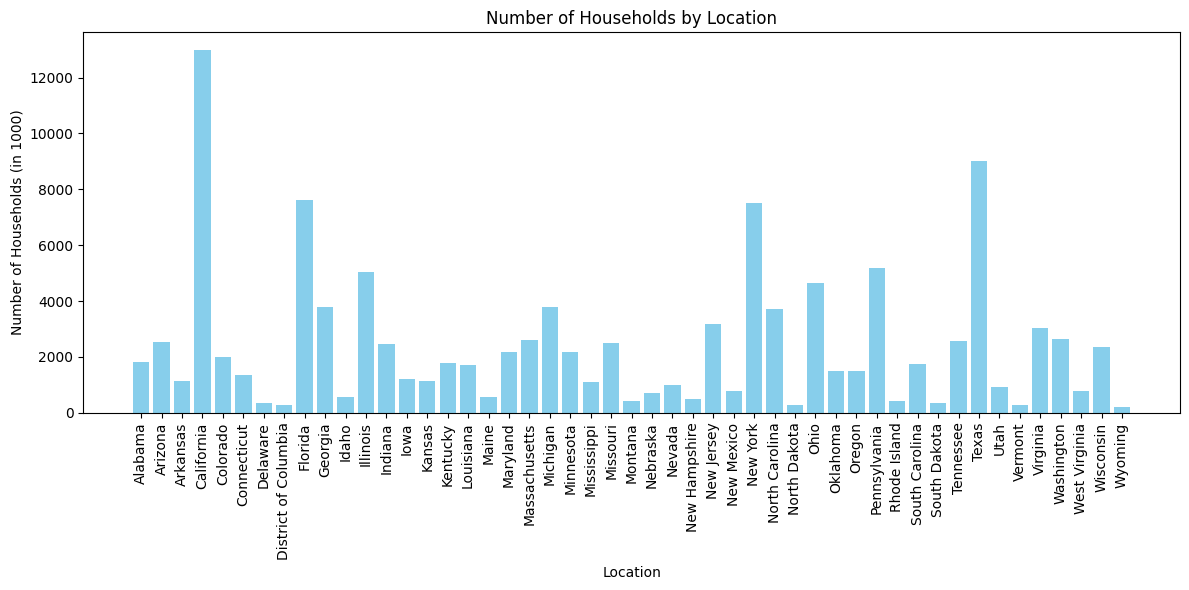

In [ ]:
# Dữ liệu cần vẽ biểu đồ cột
locations = df['Location']
households = df['Number of Households (in 1000)']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(locations, households, color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Households (in 1000)')
plt.title('Number of Households by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

**Số lượng hộ gia đình tại các địa điểm khác nhau:**

- Biểu đồ thể hiện sự phân bố số lượng hộ gia đình (tính bằng hàng nghìn) tại các địa điểm khác nhau, có thể là các bang hoặc các thành phố trong một quốc gia.

**Các địa điểm có số lượng hộ gia đình cao:**

- Các địa điểm có số lượng hộ gia đình cao nổi bật với các cột dài hơn. Điều này có thể là những khu vực đô thị lớn hoặc các thành phố với dân số tập trung đông đúc.
- Những địa điểm này có thể đại diện cho các trung tâm kinh tế, chính trị, hoặc văn hóa, nơi thu hút nhiều người đến sinh sống và làm việc.

**Các địa điểm có số lượng hộ gia đình thấp:**

- Các địa điểm có số lượng hộ gia đình thấp được thể hiện qua các cột ngắn hơn. Đây có thể là các vùng nông thôn hoặc các khu vực ít phát triển.
- Những khu vực này có thể thiếu cơ sở hạ tầng, ít cơ hội việc làm, hoặc điều kiện sống không thuận lợi, dẫn đến dân số ít hơn.

**Nhận xét cụ thể:**

- **Sự chênh lệch lớn giữa các địa điểm:** Sự khác biệt rõ rệt về chiều cao của các cột cho thấy sự phân bố không đồng đều của số lượng hộ gia đình giữa các địa điểm. Điều này phản ánh mật độ dân cư khác nhau và có thể liên quan đến mức độ phát triển kinh tế và cơ sở hạ tầng của từng khu vực.
- **Khu vực nổi bật:** Một số khu vực có cột cao vượt trội, cho thấy số lượng hộ gia đình tại đó rất lớn. Đây có thể là các thành phố lớn như New York, Los Angeles, hoặc các trung tâm đô thị khác.
- **Khu vực ít nổi bật:** Ngược lại, các khu vực có cột thấp hơn có thể là các vùng nông thôn hoặc các khu vực ít phát triển. Ví dụ, các bang như Wyoming hoặc Vermont có thể có số lượng hộ gia đình ít hơn do dân số tổng thể thấp hơn.

2.2. Number of Pet Households (in 1000)

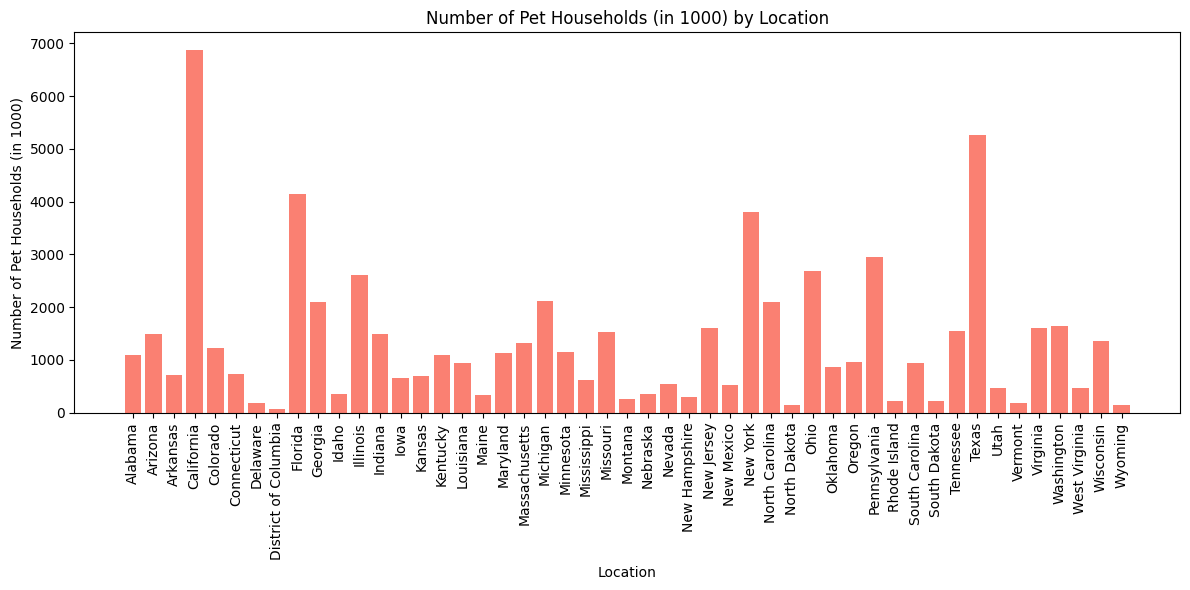

In [ ]:
# Dữ liệu cần vẽ biểu đồ cột
locations = df['Location']
pet_households = df['Number of Pet Households (in 1000)']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(locations, pet_households, color='salmon')
plt.xlabel('Location')
plt.ylabel('Number of Pet Households (in 1000)')
plt.title('Number of Pet Households (in 1000) by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

**Số lượng hộ gia đình nuôi thú cưng tại các địa điểm khác nhau:**

- Biểu đồ này thể hiện sự phân bố số lượng hộ gia đình nuôi thú cưng (tính bằng hàng nghìn) tại các địa điểm khác nhau, có thể là các bang hoặc các thành phố trong một quốc gia.

**Các địa điểm có số lượng hộ gia đình nuôi thú cưng cao:**

- Các địa điểm có số lượng hộ gia đình nuôi thú cưng cao được biểu thị qua các cột dài hơn. Những khu vực này có thể là các vùng ngoại ô hoặc các thành phố nơi người dân có xu hướng nuôi thú cưng nhiều hơn.
- Những địa điểm này có thể có điều kiện sống tốt cho thú cưng, chẳng hạn như nhà cửa có sân vườn, môi trường sống rộng rãi, và có nhiều dịch vụ liên quan đến thú cưng.

**Các địa điểm có số lượng hộ gia đình nuôi thú cưng thấp:**

- Các địa điểm có số lượng hộ gia đình nuôi thú cưng thấp được thể hiện qua các cột ngắn hơn. Điều này có thể là do các khu vực này có dân cư sống chủ yếu ở các căn hộ chung cư hoặc các khu vực đô thị có không gian hạn chế.
- Các yếu tố khác có thể bao gồm văn hóa địa phương, điều kiện khí hậu, và mức độ phổ biến của việc nuôi thú cưng.

**Nhận xét cụ thể:**

- **Sự chênh lệch lớn giữa các địa điểm:** Sự khác biệt rõ rệt về chiều cao của các cột cho thấy sự phân bố không đồng đều của số lượng hộ gia đình nuôi thú cưng giữa các địa điểm. Điều này có thể phản ánh mức độ yêu thích và khả năng nuôi thú cưng ở từng khu vực.
- **Khu vực nổi bật:** Một số khu vực có cột cao vượt trội, cho thấy số lượng hộ gia đình nuôi thú cưng tại đó rất lớn. Ví dụ, các bang như California, Texas, và Florida có thể có số lượng hộ gia đình nuôi thú cưng cao do điều kiện sống và văn hóa nuôi thú cưng phát triển.
- **Khu vực ít nổi bật:** Ngược lại, các khu vực có cột thấp hơn có thể là các thành phố lớn hoặc các khu vực đô thị nơi không gian sống hạn chế, chẳng hạn như New York City hoặc San Francisco.

2.3. Percentage of households with pets

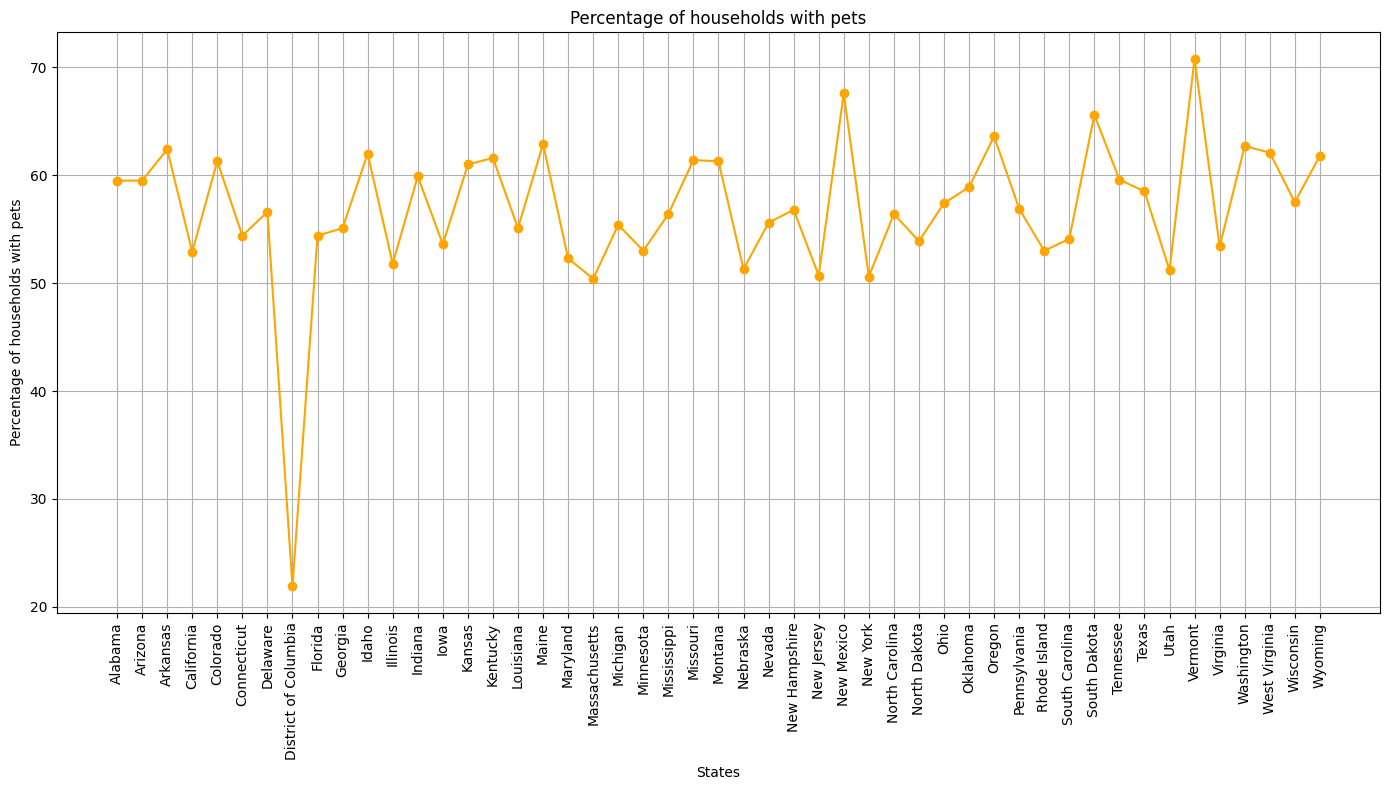

In [ ]:
states = df['Location']
percentage_households_with_pets = df['Percentage of households with pets']

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.plot(states, percentage_households_with_pets, marker='o', linestyle='-', color='orange')

# Thiết lập tiêu đề và nhãn
plt.title('Percentage of households with pets')
plt.xlabel('States')
plt.ylabel('Percentage of households with pets')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện tỷ lệ phần trăm các hộ gia đình nuôi thú cưng theo từng bang cho thấy sự phân bố của các hộ gia đình có thú cưng trên toàn quốc.

**Tỷ lệ hộ gia đình nuôi thú cưng:**

- Tỷ lệ phần trăm các hộ gia đình nuôi thú cưng dao động rất lớn giữa các bang.
- Một số bang có tỷ lệ hộ gia đình nuôi thú cưng rất cao, cho thấy văn hóa và thói quen nuôi thú cưng tại những bang này rất phổ biến.
- Ngược lại, một số bang có tỷ lệ hộ gia đình nuôi thú cưng thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi thú cưng.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có tỷ lệ hộ gia đình nuôi thú cưng cao:**
   - Những bang có tỷ lệ hộ gia đình nuôi thú cưng trên 70% thể hiện sự phổ biến của việc nuôi thú cưng.
   - Điều này có thể phản ánh một văn hóa yêu thích thú cưng mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi thú cưng, hoặc có thể là sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi thú cưng.

2. **Các bang có tỷ lệ hộ gia đình nuôi thú cưng trung bình:**
   - Những bang có tỷ lệ hộ gia đình nuôi thú cưng trong khoảng 50% - 70% cho thấy việc nuôi thú cưng khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi thú cưng của các hộ gia đình.

3. **Các bang có tỷ lệ hộ gia đình nuôi thú cưng thấp:**
   - Những bang có tỷ lệ hộ gia đình nuôi thú cưng dưới 50% cho thấy việc nuôi thú cưng không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc thậm chí là các quy định pháp lý nghiêm ngặt về việc nuôi thú cưng có thể là lý do cho tỷ lệ này.

2.4. Percentage of Dog Owners

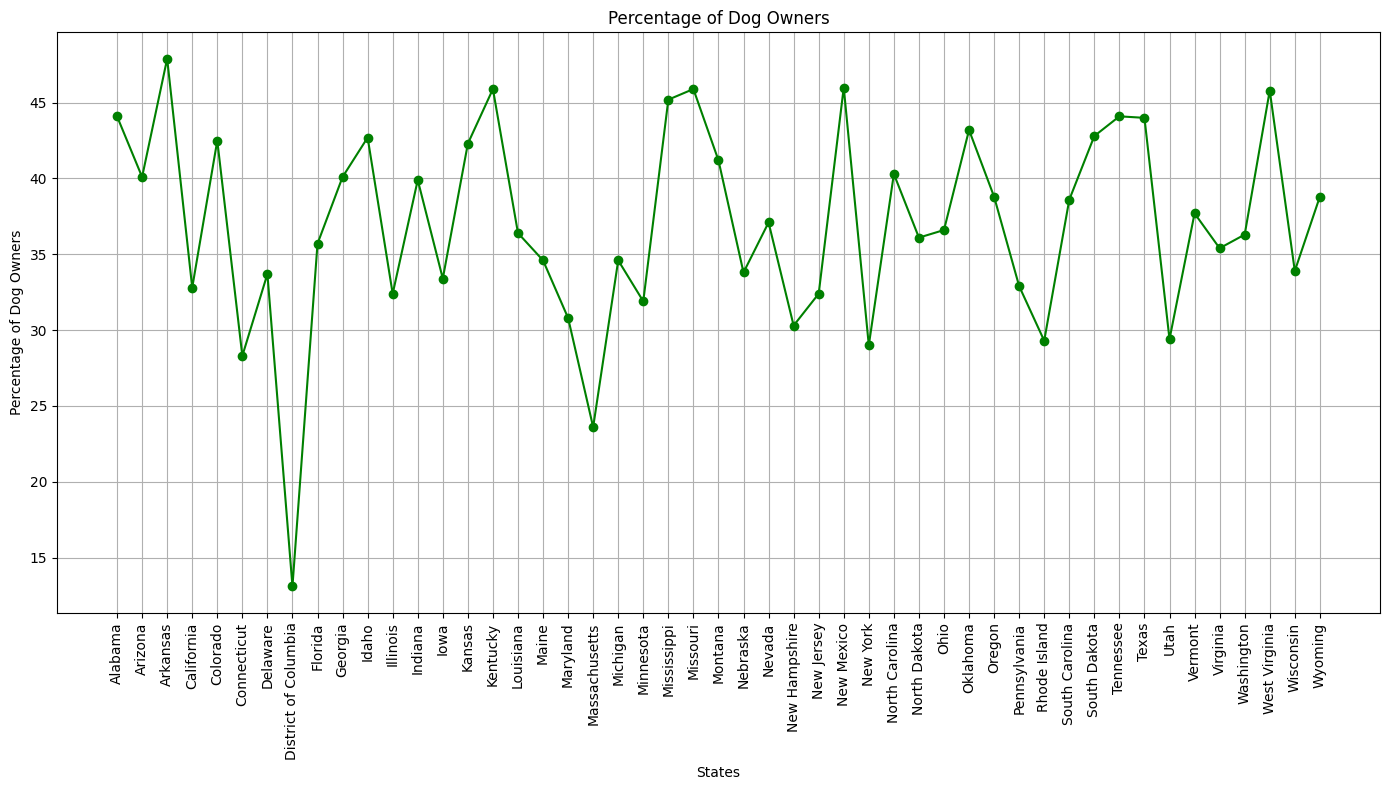

In [ ]:
states = df['Location']
percentage_dog_owners = df['Percentage of Dog Owners']

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.plot(states, percentage_dog_owners, marker='o', linestyle='-', color='green')

# Thiết lập tiêu đề và nhãn
plt.title('Percentage of Dog Owners')
plt.xlabel('States')
plt.ylabel('Percentage of Dog Owners')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện tỷ lệ phần trăm các hộ gia đình nuôi chó theo từng bang cho thấy sự phân bố của các hộ gia đình có chó trên toàn quốc.

**Tỷ lệ hộ gia đình nuôi chó:**

- Tỷ lệ phần trăm các hộ gia đình nuôi chó dao động lớn giữa các bang.
- Một số bang có tỷ lệ hộ gia đình nuôi chó rất cao, thể hiện sự phổ biến của việc nuôi chó ở những bang này.
- Ngược lại, một số bang có tỷ lệ hộ gia đình nuôi chó thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi chó.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có tỷ lệ hộ gia đình nuôi chó cao:**
   - Những bang có tỷ lệ hộ gia đình nuôi chó trên 50% cho thấy việc nuôi chó rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích chó mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi chó, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi chó.

2. **Các bang có tỷ lệ hộ gia đình nuôi chó trung bình:**
   - Những bang có tỷ lệ hộ gia đình nuôi chó trong khoảng 30% - 50% cho thấy việc nuôi chó khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi chó của các hộ gia đình.

3. **Các bang có tỷ lệ hộ gia đình nuôi chó thấp:**
   - Những bang có tỷ lệ hộ gia đình nuôi chó dưới 30% cho thấy việc nuôi chó không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi chó có thể là lý do cho tỷ lệ này.

2.5. Percentage of Cat Owners

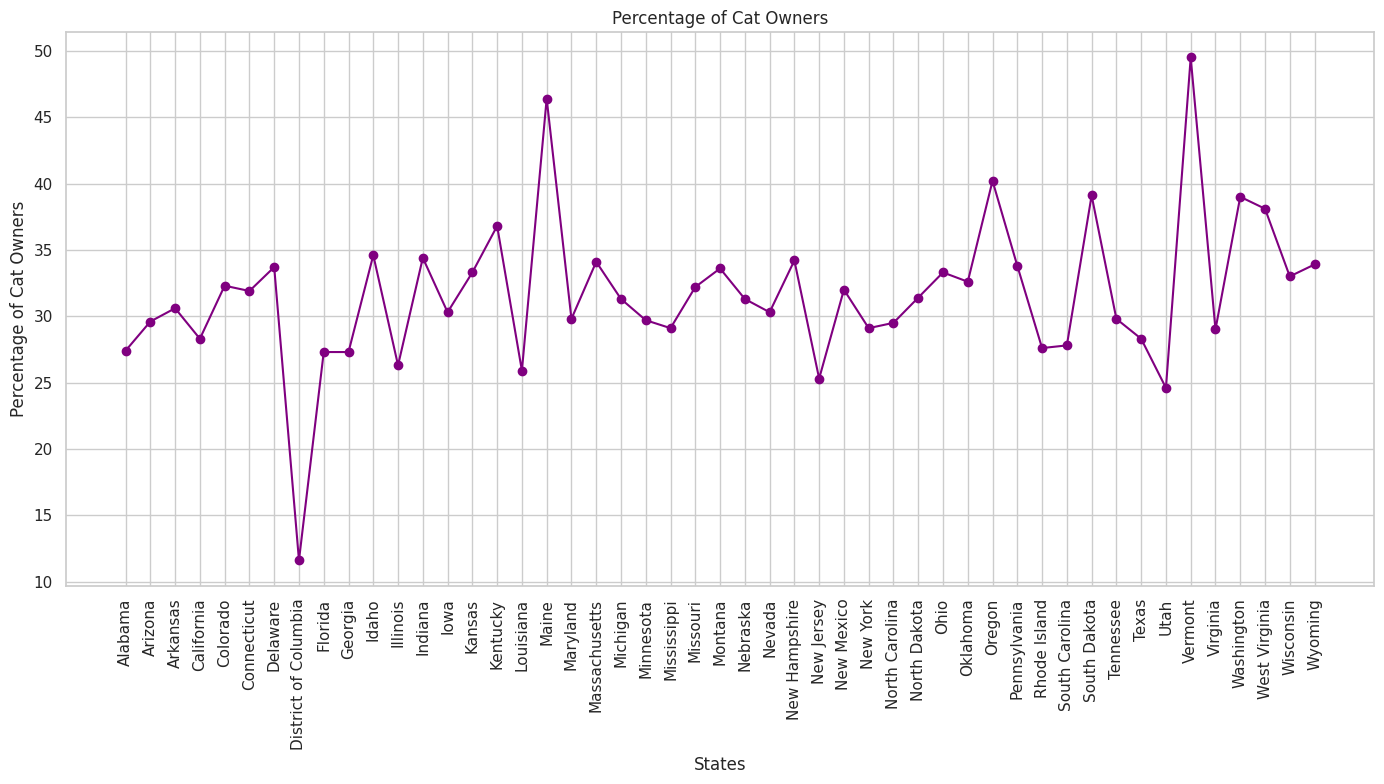

In [ ]:
states = df['Location']
percentage_cat_owners = df['Percentage of Cat Owners']

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.plot(states, percentage_cat_owners, marker='o', linestyle='-', color='purple')

# Thiết lập tiêu đề và nhãn
plt.title('Percentage of Cat Owners')
plt.xlabel('States')
plt.ylabel('Percentage of Cat Owners')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện tỷ lệ phần trăm các hộ gia đình nuôi mèo theo từng bang cho thấy sự phân bố của các hộ gia đình có mèo trên toàn quốc.

**Tỷ lệ hộ gia đình nuôi mèo:**

- Tỷ lệ phần trăm các hộ gia đình nuôi mèo dao động lớn giữa các bang.
- Một số bang có tỷ lệ hộ gia đình nuôi mèo rất cao, thể hiện sự phổ biến của việc nuôi mèo ở những bang này.
- Ngược lại, một số bang có tỷ lệ hộ gia đình nuôi mèo thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi mèo.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có tỷ lệ hộ gia đình nuôi mèo cao:**
   - Những bang có tỷ lệ hộ gia đình nuôi mèo trên 50% cho thấy việc nuôi mèo rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích mèo mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi mèo, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi mèo.

2. **Các bang có tỷ lệ hộ gia đình nuôi mèo trung bình:**
   - Những bang có tỷ lệ hộ gia đình nuôi mèo trong khoảng 30% - 50% cho thấy việc nuôi mèo khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi mèo của các hộ gia đình.

3. **Các bang có tỷ lệ hộ gia đình nuôi mèo thấp:**
   - Những bang có tỷ lệ hộ gia đình nuôi mèo dưới 30% cho thấy việc nuôi mèo không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi mèo có thể là lý do cho tỷ lệ này.

2.6. Dog Owning Households (1000s)

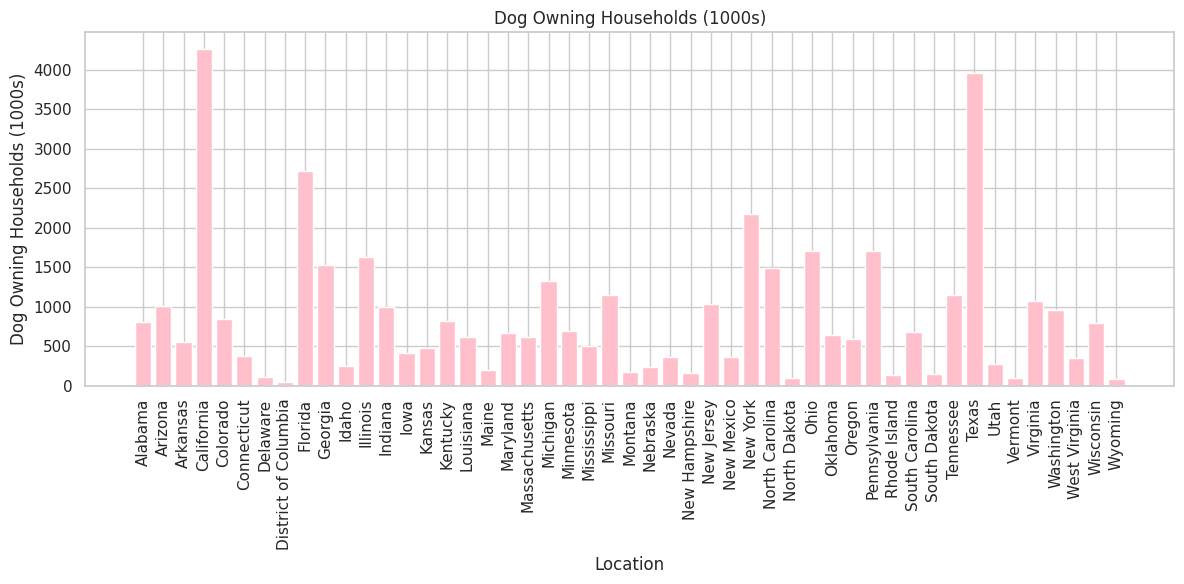

In [ ]:
locations = df['Location']
dog_owning_households = df['Dog Owning Households (1000s)']

# Vẽ biểu đồ cột cho Percentage of Dog Owners
plt.figure(figsize=(12, 6))
plt.bar(locations, dog_owning_households, color='pink')
plt.xlabel('Location')
plt.ylabel('Dog Owning Households (1000s)')
plt.title('Dog Owning Households (1000s)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện số lượng hộ gia đình nuôi chó (đơn vị: 1000 hộ) theo từng bang cho thấy sự phân bố của các hộ gia đình nuôi chó trên toàn quốc.

**Số lượng hộ gia đình nuôi chó:**

- Số lượng hộ gia đình nuôi chó dao động lớn giữa các bang.
- Một số bang có số lượng hộ gia đình nuôi chó rất cao, thể hiện sự phổ biến của việc nuôi chó ở những bang này.
- Ngược lại, một số bang có số lượng hộ gia đình nuôi chó thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi chó.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có số lượng hộ gia đình nuôi chó cao:**
   - Những bang có số lượng hộ gia đình nuôi chó trên 1000 hộ cho thấy việc nuôi chó rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích chó mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi chó, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi chó.

2. **Các bang có số lượng hộ gia đình nuôi chó trung bình:**
   - Những bang có số lượng hộ gia đình nuôi chó trong khoảng 500 - 1000 hộ cho thấy việc nuôi chó khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi chó của các hộ gia đình.

3. **Các bang có số lượng hộ gia đình nuôi chó thấp:**
   - Những bang có số lượng hộ gia đình nuôi chó dưới 500 hộ cho thấy việc nuôi chó không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi chó có thể là lý do cho số lượng này.

2.7. Cat Owning Households

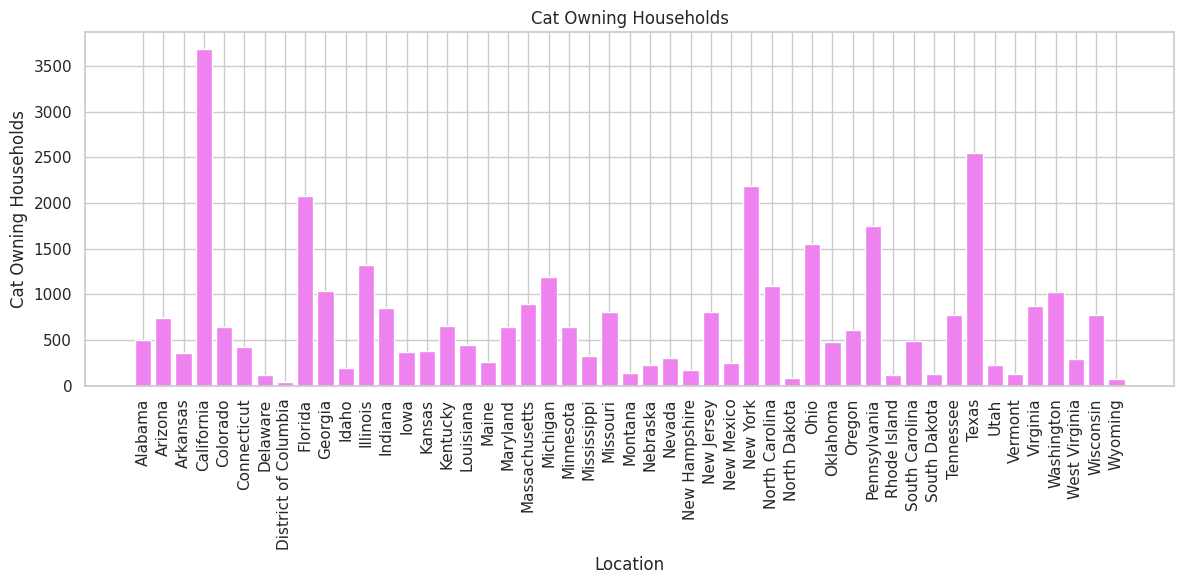

In [ ]:
locations = df['Location']
cat_owning_households = df['Cat Owning Households']

# Vẽ biểu đồ cột cho Percentage of Dog Owners
plt.figure(figsize=(12, 6))
plt.bar(locations, cat_owning_households, color='violet')
plt.xlabel('Location')
plt.ylabel('Cat Owning Households')
plt.title('Cat Owning Households')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện số lượng hộ gia đình nuôi mèo theo từng bang cho thấy sự phân bố của các hộ gia đình nuôi mèo trên toàn quốc.

**Số lượng hộ gia đình nuôi mèo:**

- Số lượng hộ gia đình nuôi mèo dao động lớn giữa các bang.
- Một số bang có số lượng hộ gia đình nuôi mèo rất cao, thể hiện sự phổ biến của việc nuôi mèo ở những bang này.
- Ngược lại, một số bang có số lượng hộ gia đình nuôi mèo thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi mèo.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có số lượng hộ gia đình nuôi mèo cao:**
   - Những bang có số lượng hộ gia đình nuôi mèo trên mức trung bình cho thấy việc nuôi mèo rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích mèo mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi mèo, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi mèo.

2. **Các bang có số lượng hộ gia đình nuôi mèo trung bình:**
   - Những bang có số lượng hộ gia đình nuôi mèo trong khoảng trung bình cho thấy việc nuôi mèo khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi mèo của các hộ gia đình.

3. **Các bang có số lượng hộ gia đình nuôi mèo thấp:**
   - Những bang có số lượng hộ gia đình nuôi mèo dưới mức trung bình cho thấy việc nuôi mèo không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi mèo có thể là lý do cho số lượng này.

2.8. Mean Number of Dogs per household

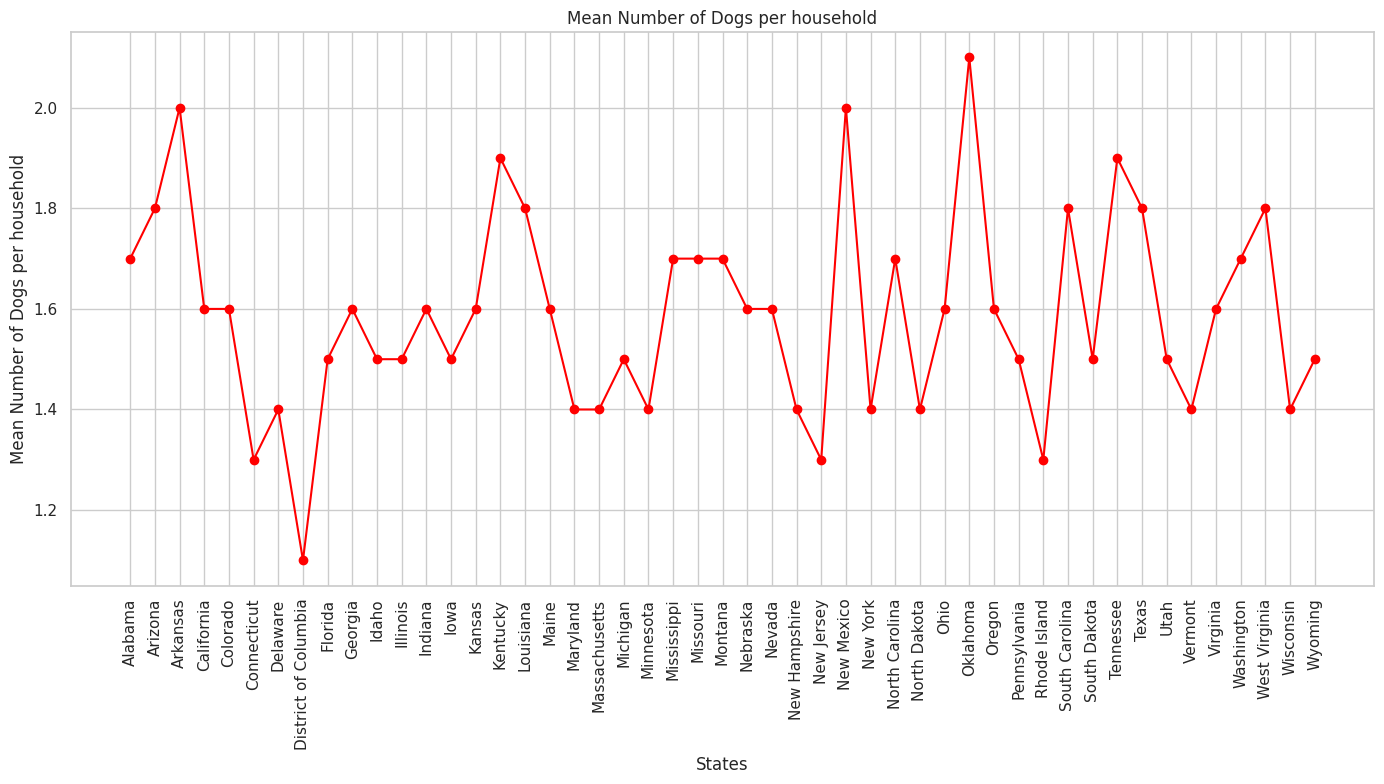

In [ ]:
states = df['Location']
mean_dogs_per_household = df['Mean Number of Dogs per household']

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.plot(states, mean_dogs_per_household, marker='o', linestyle='-', color='red')

# Thiết lập tiêu đề và nhãn
plt.title('Mean Number of Dogs per household')
plt.xlabel('States')
plt.ylabel('Mean Number of Dogs per household')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện số lượng trung bình chó nuôi trên mỗi hộ gia đình theo từng bang. Điều này cho thấy sự phân bố và mức độ phổ biến của việc nuôi chó trên toàn quốc.

**Số lượng trung bình chó nuôi trên mỗi hộ gia đình:**

- Số lượng trung bình chó nuôi trên mỗi hộ gia đình dao động lớn giữa các bang.
- Một số bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình rất cao, thể hiện sự phổ biến của việc nuôi chó ở những bang này.
- Ngược lại, một số bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi chó.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình cao:**
   - Những bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình trên mức trung bình cho thấy việc nuôi chó rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích chó mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi chó, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi chó.

2. **Các bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình trung bình:**
   - Những bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình trong khoảng trung bình cho thấy việc nuôi chó khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi chó của các hộ gia đình.

3. **Các bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình thấp:**
   - Những bang có số lượng trung bình chó nuôi trên mỗi hộ gia đình dưới mức trung bình cho thấy việc nuôi chó không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi chó có thể là lý do cho số lượng này.

2.9. Mean Number of Cats

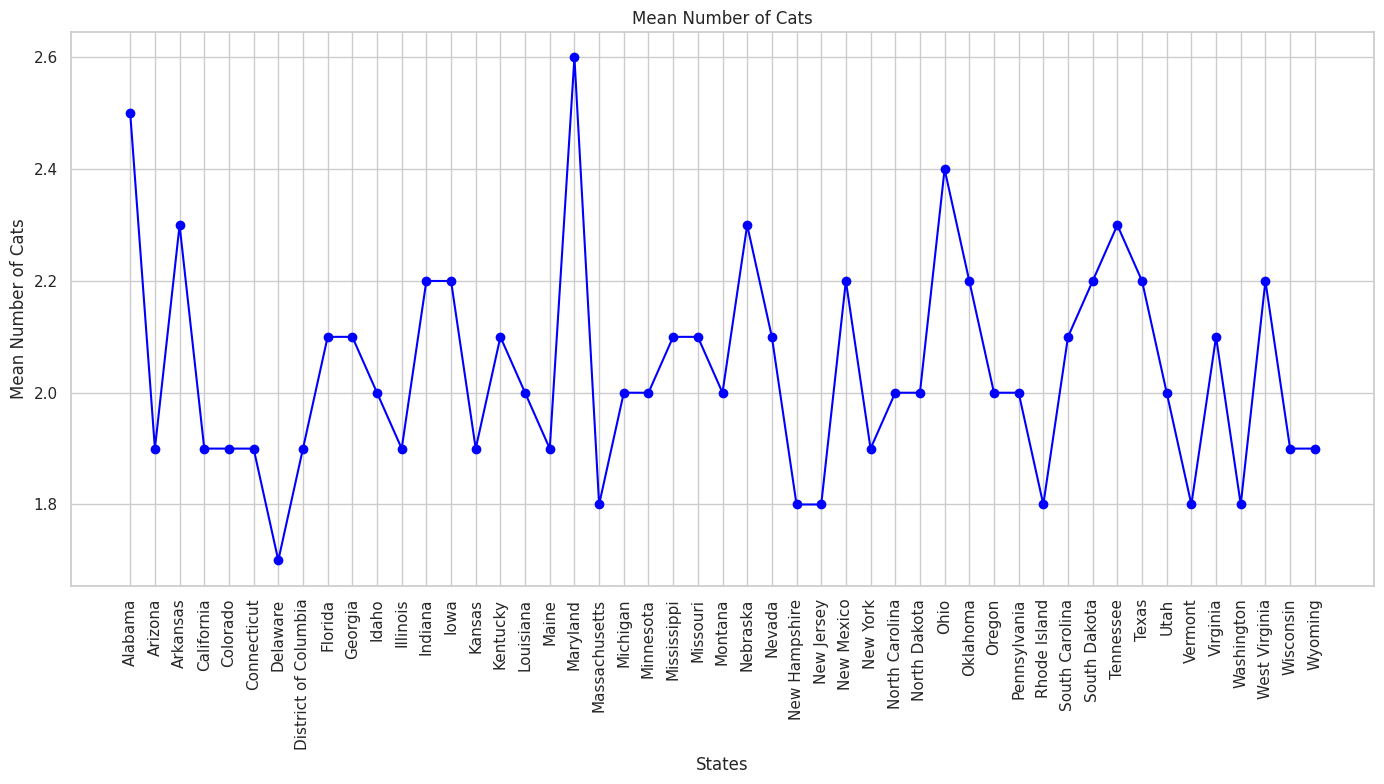

In [ ]:
states = df['Location']
mean_cats_per_household = df['Mean Number of Cats']

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.plot(states, mean_cats_per_household, marker='o', linestyle='-', color='blue')

# Thiết lập tiêu đề và nhãn
plt.title('Mean Number of Cats')
plt.xlabel('States')
plt.ylabel('Mean Number of Cats')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện số lượng trung bình mèo nuôi trên mỗi hộ gia đình theo từng bang. Điều này cho thấy sự phân bố và mức độ phổ biến của việc nuôi mèo trên toàn quốc.

**Số lượng trung bình mèo nuôi trên mỗi hộ gia đình:**

- Số lượng trung bình mèo nuôi trên mỗi hộ gia đình dao động lớn giữa các bang.
- Một số bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình rất cao, thể hiện sự phổ biến của việc nuôi mèo ở những bang này.
- Ngược lại, một số bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu hoặc quan điểm văn hóa về việc nuôi mèo.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình cao:**
   - Những bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình trên mức trung bình cho thấy việc nuôi mèo rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích mèo mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi mèo, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi mèo.

2. **Các bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình trung bình:**
   - Những bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình trong khoảng trung bình cho thấy việc nuôi mèo khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi mèo của các hộ gia đình.

3. **Các bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình thấp:**
   - Những bang có số lượng trung bình mèo nuôi trên mỗi hộ gia đình dưới mức trung bình cho thấy việc nuôi mèo không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi mèo có thể là lý do cho số lượng này.

2.10. Dog Population (in 1000)

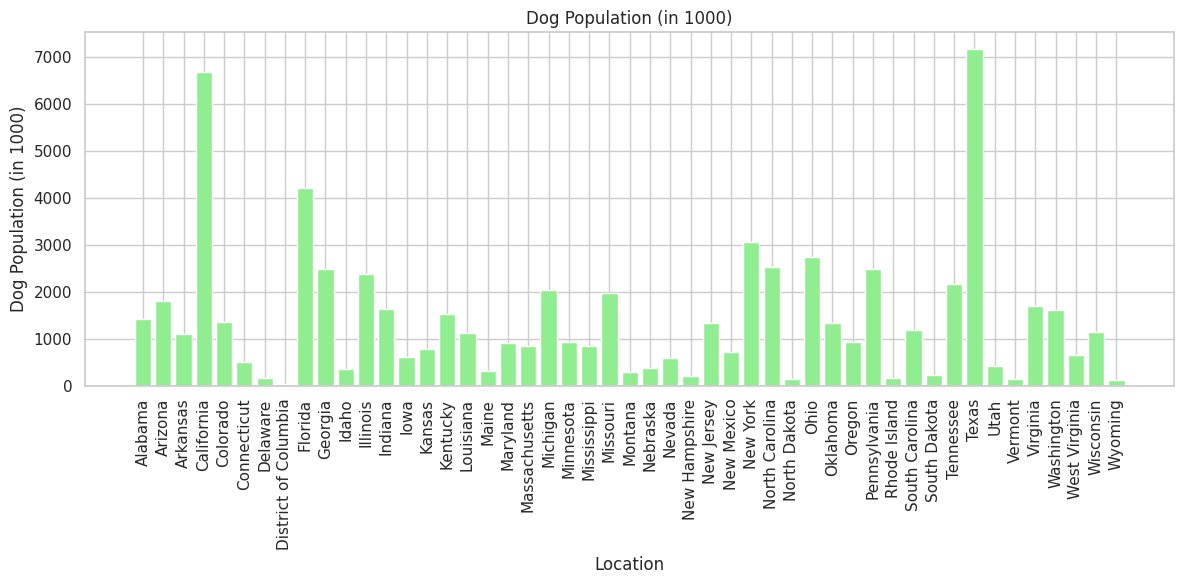

In [ ]:
locations = df['Location']
dog_population= df['Dog Population (in 1000)']

# Vẽ biểu đồ cột cho Percentage of Dog Owners
plt.figure(figsize=(12, 6))
plt.bar(locations, dog_population, color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Dog Population (in 1000)')
plt.title('Dog Population (in 1000)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện dân số chó (tính bằng hàng ngàn) theo từng bang. Điều này giúp chúng ta hiểu rõ hơn về phân bố dân số chó trên toàn quốc.

**Dân số chó theo từng bang:**

- Dân số chó có sự khác biệt đáng kể giữa các bang.
- Một số bang có dân số chó rất cao, cho thấy sự phổ biến của việc nuôi chó trong các hộ gia đình tại những bang này.
- Ngược lại, một số bang có dân số chó thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu, hoặc quan điểm văn hóa về việc nuôi chó.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có dân số chó cao:**
   - Những bang có dân số chó trên mức trung bình cho thấy việc nuôi chó rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích chó mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi chó, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi chó.

2. **Các bang có dân số chó trung bình:**
   - Những bang có dân số chó trong khoảng trung bình cho thấy việc nuôi chó khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi chó của các hộ gia đình.

3. **Các bang có dân số chó thấp:**
   - Những bang có dân số chó dưới mức trung bình cho thấy việc nuôi chó không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi chó có thể là lý do cho số lượng này.

2.11. Cat Population

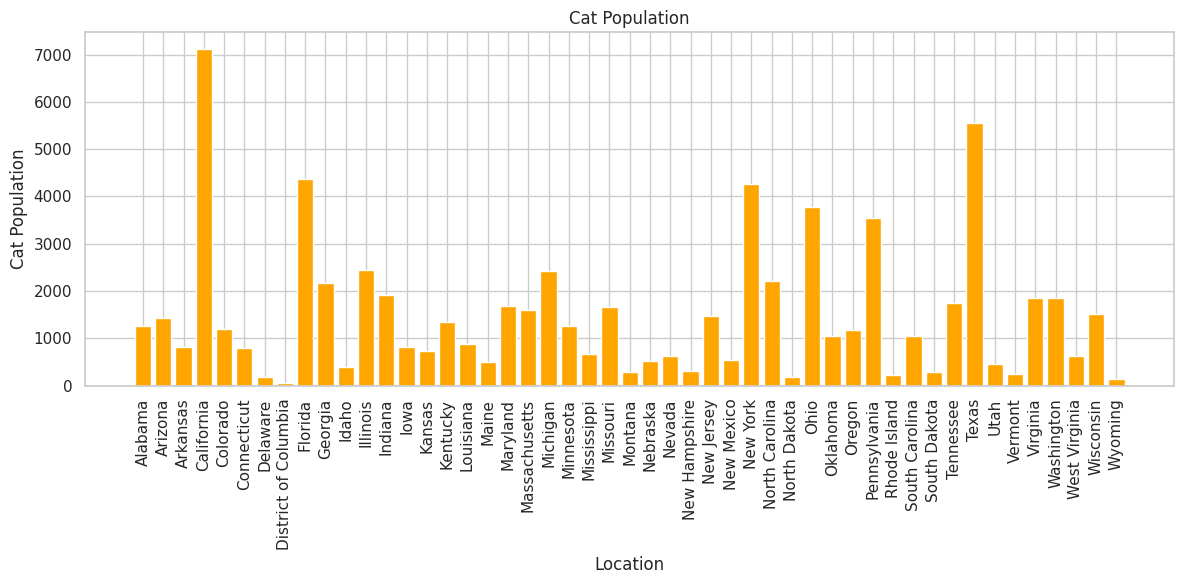

In [ ]:
locations = df['Location']
cat_population = df['Cat Population']

# Vẽ biểu đồ cột cho Cat Population
plt.figure(figsize=(12, 6))
plt.bar(locations, cat_population, color='orange')
plt.xlabel('Location')
plt.ylabel('Cat Population')
plt.title('Cat Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét chung:**

Biểu đồ thể hiện dân số mèo theo từng bang. Điều này giúp chúng ta hiểu rõ hơn về phân bố dân số mèo trên toàn quốc.

**Dân số mèo theo từng bang:**

- Dân số mèo có sự khác biệt đáng kể giữa các bang.
- Một số bang có dân số mèo rất cao, cho thấy sự phổ biến của việc nuôi mèo trong các hộ gia đình tại những bang này.
- Ngược lại, một số bang có dân số mèo thấp hơn, có thể do các yếu tố như điều kiện sống, khí hậu, hoặc quan điểm văn hóa về việc nuôi mèo.

**Nhận xét cụ thể về dữ liệu:**

1. **Các bang có dân số mèo cao:**
   - Những bang có dân số mèo trên mức trung bình cho thấy việc nuôi mèo rất phổ biến.
   - Điều này có thể phản ánh văn hóa yêu thích mèo mạnh mẽ, điều kiện sống thuận lợi cho việc nuôi mèo, hoặc sự hiện diện của nhiều dịch vụ và cơ sở hạ tầng hỗ trợ cho việc nuôi mèo.

2. **Các bang có dân số mèo trung bình:**
   - Những bang có dân số mèo trong khoảng trung bình cho thấy việc nuôi mèo khá phổ biến nhưng không ở mức độ cao nhất.
   - Có thể có các yếu tố trung gian như môi trường sống, kinh tế, và sự đa dạng văn hóa ảnh hưởng đến quyết định nuôi mèo của các hộ gia đình.

3. **Các bang có dân số mèo thấp:**
   - Những bang có dân số mèo dưới mức trung bình cho thấy việc nuôi mèo không phổ biến.
   - Những yếu tố như điều kiện khí hậu khắc nghiệt, không gian sống hạn chế, hoặc các quy định pháp lý nghiêm ngặt về việc nuôi mèo có thể là lý do cho số lượng này.

# Kết luận:

**Kết luận tổng quan:**

Dữ liệu và các biểu đồ phân tích cho thấy một cái nhìn sâu sắc về tình hình sở hữu thú cưng, đặc biệt là chó và mèo, tại các bang khác nhau. Dưới đây là những điểm chính từ các phân tích:

1. **Tỷ lệ hộ gia đình sở hữu thú cưng:**
   - Tỷ lệ sở hữu thú cưng thay đổi đáng kể giữa các bang, phản ánh sự khác biệt trong văn hóa nuôi thú cưng, điều kiện sống, và các yếu tố kinh tế xã hội.
   - Một số bang có tỷ lệ sở hữu thú cưng cao, cho thấy tình yêu và sự quan tâm đến thú cưng mạnh mẽ, cũng như các điều kiện thuận lợi cho việc nuôi dưỡng thú cưng.

2. **Tỷ lệ sở hữu chó và mèo:**
   - Tỷ lệ sở hữu chó và mèo có sự khác biệt rõ rệt giữa các bang.
   - Các bang có tỷ lệ sở hữu chó cao có thể phản ánh nhu cầu về các giống chó bảo vệ, săn bắn, hoặc làm bạn đồng hành.
   - Các bang có tỷ lệ sở hữu mèo cao thường liên quan đến điều kiện sống thuận lợi cho mèo, như không gian sống nhỏ gọn hoặc lối sống đô thị.

3. **Số lượng hộ gia đình sở hữu thú cưng:**
   - Số lượng hộ gia đình sở hữu chó và mèo thể hiện rõ sự phổ biến của việc nuôi thú cưng trong các hộ gia đình.
   - Sự phân bố này cũng cho thấy mức độ quan tâm và đầu tư của các hộ gia đình vào việc nuôi dưỡng và chăm sóc thú cưng.

4. **Số lượng chó và mèo trung bình mỗi hộ gia đình:**
   - Số lượng chó và mèo trung bình mỗi hộ gia đình khác nhau giữa các bang, phản ánh các yếu tố văn hóa, kinh tế, và điều kiện sống.
   - Những bang có số lượng chó và mèo trung bình cao cho thấy mức độ yêu thích và cam kết đối với việc nuôi thú cưng.

5. **Dân số chó và mèo:**
   - Dân số chó và mèo theo từng bang cung cấp cái nhìn tổng thể về quy mô và sự phổ biến của việc nuôi thú cưng trên toàn quốc.
   - Các bang có dân số chó và mèo cao thường là những khu vực có điều kiện sống thuận lợi và có các dịch vụ hỗ trợ tốt cho việc nuôi dưỡng thú cưng.

**Tổng kết:**

- Dữ liệu và biểu đồ phân tích cho thấy sự đa dạng và phức tạp trong việc sở hữu và nuôi dưỡng thú cưng tại các bang khác nhau.
- Hiểu rõ sự phân bố và các yếu tố ảnh hưởng đến việc nuôi thú cưng có thể giúp các doanh nghiệp, tổ chức và nhà nghiên cứu phát triển các dịch vụ, sản phẩm và chính sách phù hợp để đáp ứng nhu cầu của người dân.
- Đồng thời, các thông tin này cũng có thể hỗ trợ trong việc nâng cao nhận thức về lợi ích và trách nhiệm của việc nuôi thú cưng, từ đó thúc đẩy một môi trường sống tốt đẹp hơn cho cả con người và thú cưng.

# 3. Biểu đồ so sánh thông tin các dữ liệu

3.1. Number of Households (in 1000) và Percentage of households with pets

<ipython-input-119-47546b0f81d0>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


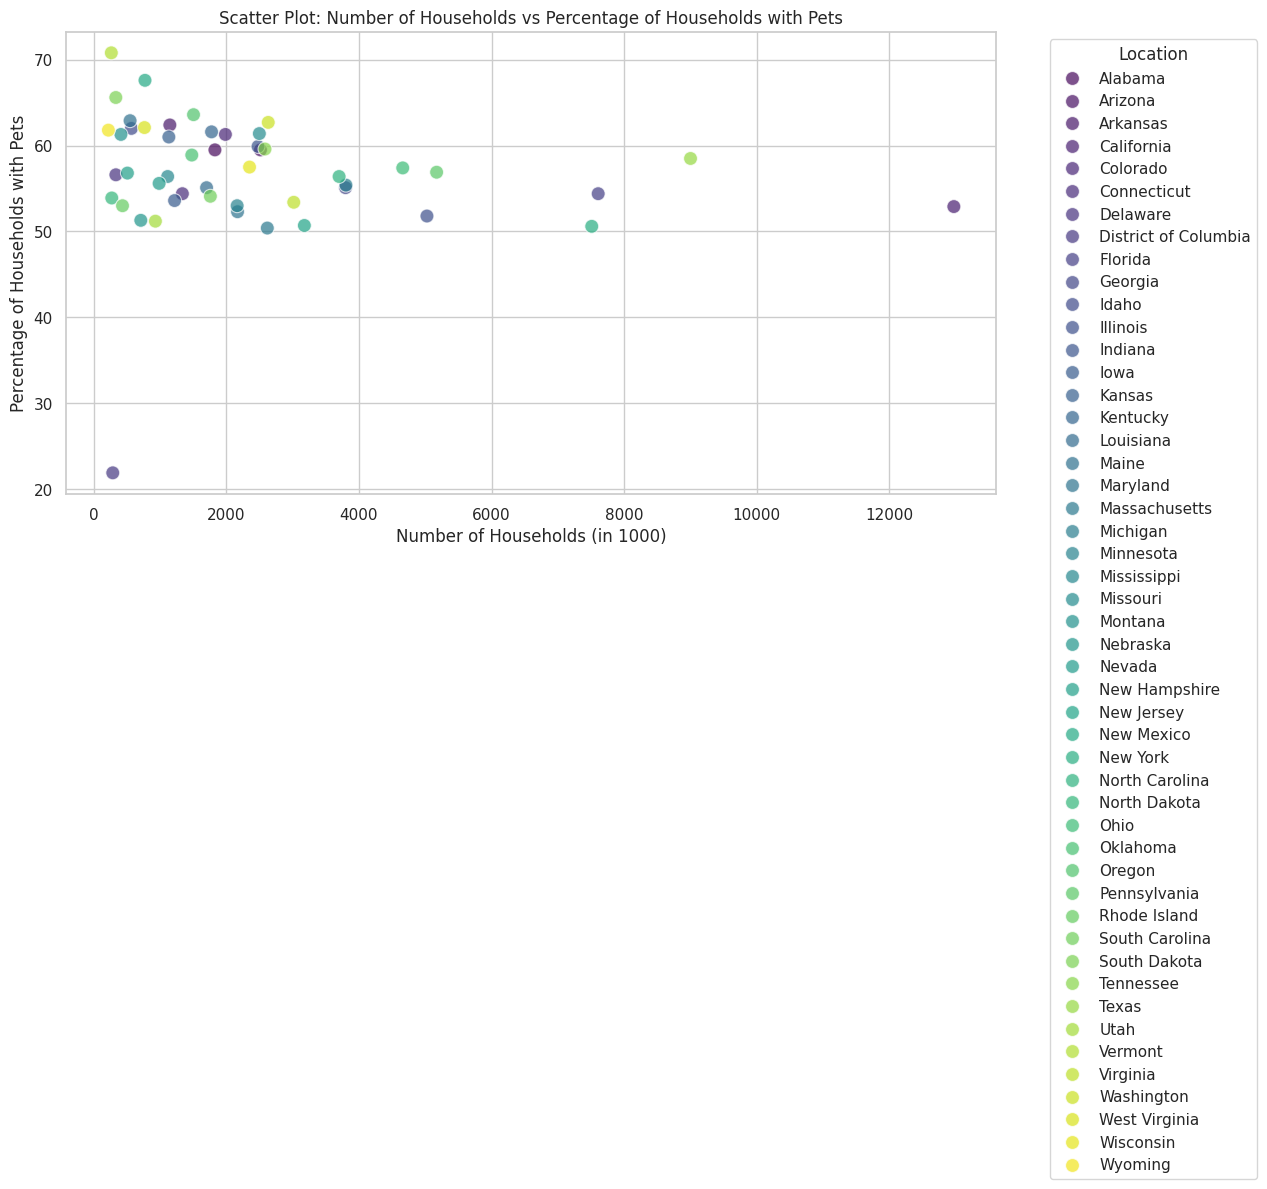

In [ ]:
# Đổi tên các cột cho dễ hiểu
df.columns = [
    'Location', 'Number of Households (in 1000)', 'Percentage of households with pets',
    'Number of Pet Households (in 1000)', 'Percentage of Dog Owners', 'Dog Owning Households (1000)',
    'Mean Number of Dogs per household', 'Dog Population (in 1000)', 'Percentage of Cat Owners',
    'Cat Owning Households', 'Mean Number of Cats per household', 'Cat Population'
]

# Thiết lập phong cách cho seaborn
sns.set(style="whitegrid")

# Biểu đồ điểm cho "Number of Households (in 1000)" và "Percentage of households with pets"
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(
    x='Number of Households (in 1000)',
    y='Percentage of households with pets',
    data=df,
    hue='Location',
    palette='viridis',
    s=100,
    edgecolor='w',
    alpha=0.7
)

# Thêm tiêu đề và nhãn cho các trục
scatter_plot.set_title('Scatter Plot: Number of Households vs Percentage of Households with Pets')
scatter_plot.set_xlabel('Number of Households (in 1000)')
scatter_plot.set_ylabel('Percentage of Households with Pets')

# Hiển thị chú thích (legend)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Location')

# Hiển thị lưới trên biểu đồ
plt.grid(True)

# Tự động điều chỉnh tỷ lệ và khoảng cách giữa các thành phần của biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Nhận xét chung:**

- Biểu đồ cho thấy một phân bố rộng lớn về số lượng hộ gia đình và tỷ lệ hộ gia đình có thú cưng trên lãnh thổ Mỹ. Mỗi điểm trên biểu đồ biểu thị cho một bang, với màu sắc khác nhau giúp phân biệt dễ dàng.

- Các điểm nằm trên đồ thị phân bố từ phía dưới bên trái lên đến phía trên bên phải, cho thấy mối quan hệ dương tính giữa số lượng hộ gia đình và tỷ lệ hộ gia đình có thú cưng. Điều này có nghĩa là các bang có số lượng hộ gia đình lớn hơn thường có tỷ lệ hộ gia đình có thú cưng cao hơn.

**Phân tích cụ thể:**

1. **Các bang có số lượng hộ gia đình cao và tỷ lệ hộ gia đình có thú cưng cao:**
   - Các bang như California, Texas và New York có số lượng hộ gia đình rất lớn và tỷ lệ hộ gia đình có thú cưng cao hơn so với các bang khác trên biểu đồ. Điều này có thể phản ánh sự phổ biến của việc nuôi thú cưng trong các thành phố lớn và các khu dân cư đông đúc.

2. **Các bang có số lượng hộ gia đình cao nhưng tỷ lệ hộ gia đình có thú cưng thấp:**
   - Một số bang như Texas, Florida có số lượng hộ gia đình lớn nhưng tỷ lệ hộ gia đình có thú cưng không cao như các bang khác. Điều này có thể liên quan đến một số yếu tố như địa lý, văn hóa, hoặc chính sách về việc nuôi thú cưng trong các khu vực này.

3. **Các bang có số lượng hộ gia đình thấp và tỷ lệ hộ gia đình có thú cưng cao:**
   - Có một vài bang nhỏ có số lượng hộ gia đình thấp nhưng tỷ lệ hộ gia đình có thú cưng cao, ví dụ như Vermont. Điều này có thể do môi trường sống thích hợp và mối quan tâm đặc biệt đến vấn đề nuôi thú cưng trong cộng đồng.

3.2. Number of Households (in 1000) và Number of Pet Households (in 1000)

<ipython-input-36-a367a2914c0c>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


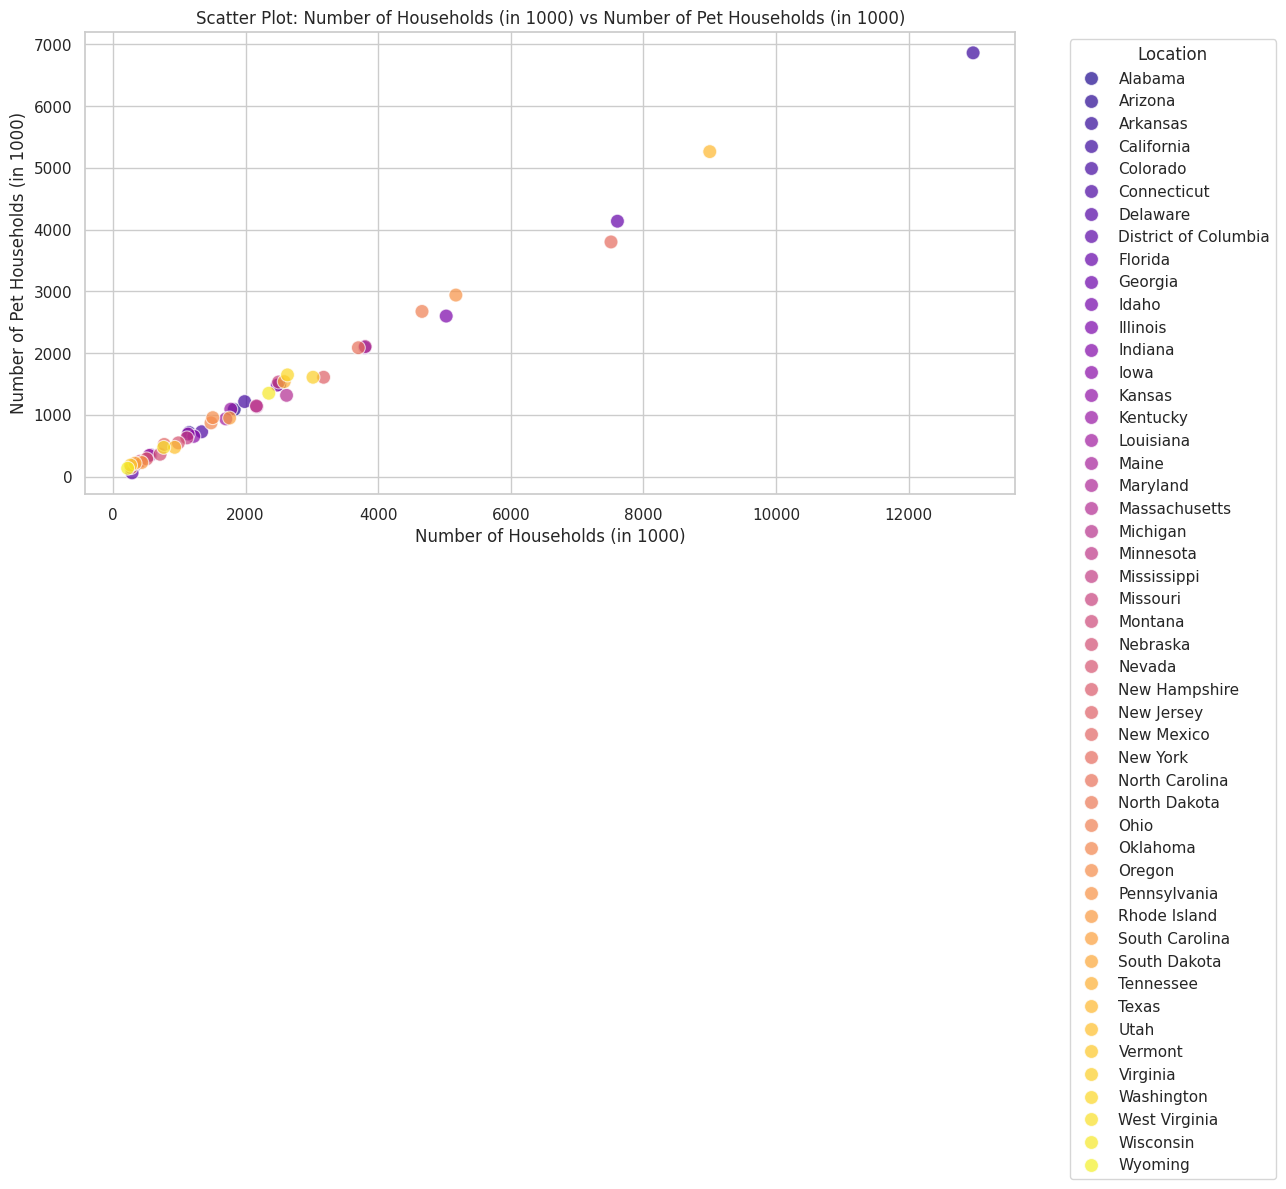

In [ ]:
# Đổi tên các cột cho dễ hiểu
df.columns = [
    'Location', 'Number of Households (in 1000)', 'Percentage of households with pets',
    'Number of Pet Households (in 1000)', 'Percentage of Dog Owners', 'Dog Owning Households (1000)',
    'Mean Number of Dogs per household', 'Dog Population (in 1000)', 'Percentage of Cat Owners',
    'Cat Owning Households', 'Mean Number of Cats per household', 'Cat Population'
]

# Thiết lập phong cách cho seaborn
sns.set(style="whitegrid")

# Biểu đồ điểm cho "Percentage of households with pets" và "Number of Pet Households (in 1000)"
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(
    x='Number of Households (in 1000)',
    y='Number of Pet Households (in 1000)',
    data=df,
    hue='Location',
    palette='plasma',
    s=100,
    edgecolor='w',
    alpha=0.7
)

# Thêm tiêu đề và nhãn cho các trục
scatter_plot.set_title('Scatter Plot: Number of Households (in 1000) vs Number of Pet Households (in 1000)')
scatter_plot.set_xlabel('Number of Households (in 1000)')
scatter_plot.set_ylabel('Number of Pet Households (in 1000)')

# Hiển thị chú thích (legend)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Location')

# Hiển thị lưới trên biểu đồ
plt.grid(True)

# Tự động điều chỉnh tỷ lệ và khoảng cách giữa các thành phần của biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Nhận xét chung:**

- Biểu đồ cho thấy mối quan hệ dương tính mạnh mẽ giữa số lượng hộ gia đình và số lượng hộ nuôi thú cưng ở các bang của Mỹ. Điều này có nghĩa là các bang có nhiều hộ gia đình hơn thường có số lượng hộ nuôi thú cưng cao hơn.

**Phân tích cụ thể:**

1. **Các bang có số lượng hộ gia đình cao và số lượng hộ nuôi thú cưng cao:**
   - Các bang như California, Texas và Florida có số lượng hộ gia đình lớn và số lượng hộ nuôi thú cưng cũng cao hơn so với các bang khác trên biểu đồ. Điều này cho thấy việc nuôi thú cưng phổ biến trong các khu vực đông dân cư và phát triển.

2. **Các bang có số lượng hộ gia đình cao nhưng số lượng hộ nuôi thú cưng thấp:**
   - Có một vài bang như Texas, New York có số lượng hộ gia đình lớn nhưng số lượng hộ nuôi thú cưng không cao như các bang khác. Điều này có thể phụ thuộc vào các yếu tố như văn hóa, độ phổ biến của việc nuôi thú cưng, hoặc điều kiện sống của từng khu vực.

3. **Các bang có số lượng hộ gia đình thấp nhưng số lượng hộ nuôi thú cưng cao:**
   - Vermont là một ví dụ, có số lượng hộ gia đình thấp nhưng số lượng hộ nuôi thú cưng lại cao. Điều này có thể liên quan đến các yếu tố như môi trường sống thuận lợi cho việc nuôi thú cưng và sự yêu thích của cộng đồng đối với các loài vật cưng.

In [ ]:
# Kiểm tra tên các cột trong DataFrame
print(df.columns)


Index(['Location', 'Number of Households (in 1000)',
       'Percentage of households with pets',
       'Number of Pet Households (in 1000)', 'Percentage of Dog Owners',
       'Dog Owning Households (1000)', 'Mean Number of Dogs per household',
       'Dog Population (in 1000)', 'Percentage of Cat Owners',
       'Cat Owning Households', 'Mean Number of Cats per household',
       'Cat Population'],
      dtype='object')


3.3. Mean Number of Dogs và Cats per Household by State


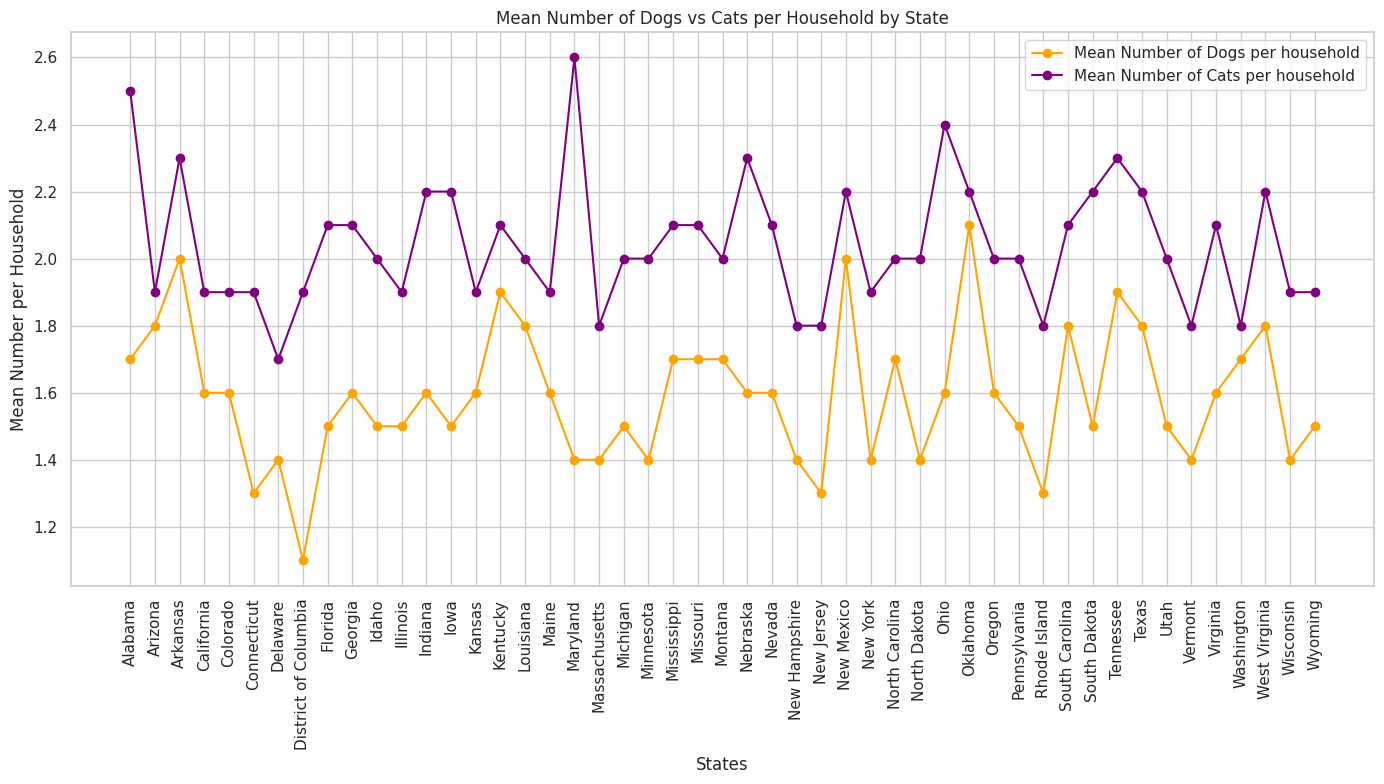

In [ ]:
# Trích xuất các cột liên quan đến bang, số lượng chó và mèo trung bình mỗi hộ gia đình
states = df['Location']
mean_dogs_per_household = df['Mean Number of Dogs per household']
mean_cats_per_household = df['Mean Number of Cats per household']

# Thiết lập vị trí cho các cột
index = np.arange(len(states))

# Vẽ biểu đồ đường
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(index, mean_dogs_per_household, label='Mean Number of Dogs per household', color='orange', marker='o')
ax.plot(index, mean_cats_per_household, label='Mean Number of Cats per household', color='purple', marker='o')

# Thiết lập tiêu đề và nhãn
ax.set_title('Mean Number of Dogs vs Cats per Household by State')
ax.set_xlabel('States')
ax.set_ylabel('Mean Number per Household')
ax.set_xticks(index)
ax.set_xticklabels(states, rotation=90)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

- Biểu đồ cho thấy sự khác biệt trong số lượng trung bình chó và mèo mỗi hộ gia đình giữa các bang của Mỹ. Nhìn chung số lượng người nuôi mèo nhiều hơn nuôi chó

**Phân tích cụ thể:**

1. **Số lượng chó trung bình mỗi hộ gia đình:**
   - Có các bang như Idaho, Wyoming, và Arkansas có số lượng chó trung bình mỗi hộ gia đình cao hơn so với các bang khác. Điều này có thể phản ánh sự yêu thích nuôi chó mạnh mẽ trong các khu vực này.

2. **Số lượng mèo trung bình mỗi hộ gia đình:**
   - Các bang Vermont, Maine, và West Virginia có số lượng mèo trung bình mỗi hộ gia đình cao hơn so với các bang khác. Điều này cho thấy việc nuôi mèo được ưa chuộng hơn trong những bang này.

3. **Các bang có sự khác biệt rõ rệt giữa chó và mèo:**
   - Một số bang như New York và New Jersey có sự khác biệt lớn giữa số lượng chó và mèo trung bình mỗi hộ gia đình. Điều này có thể phản ánh sự ưa thích và sự phân bố của các loài vật cưng trong cộng đồng.


3.4. Dog Population và Cat Population by State

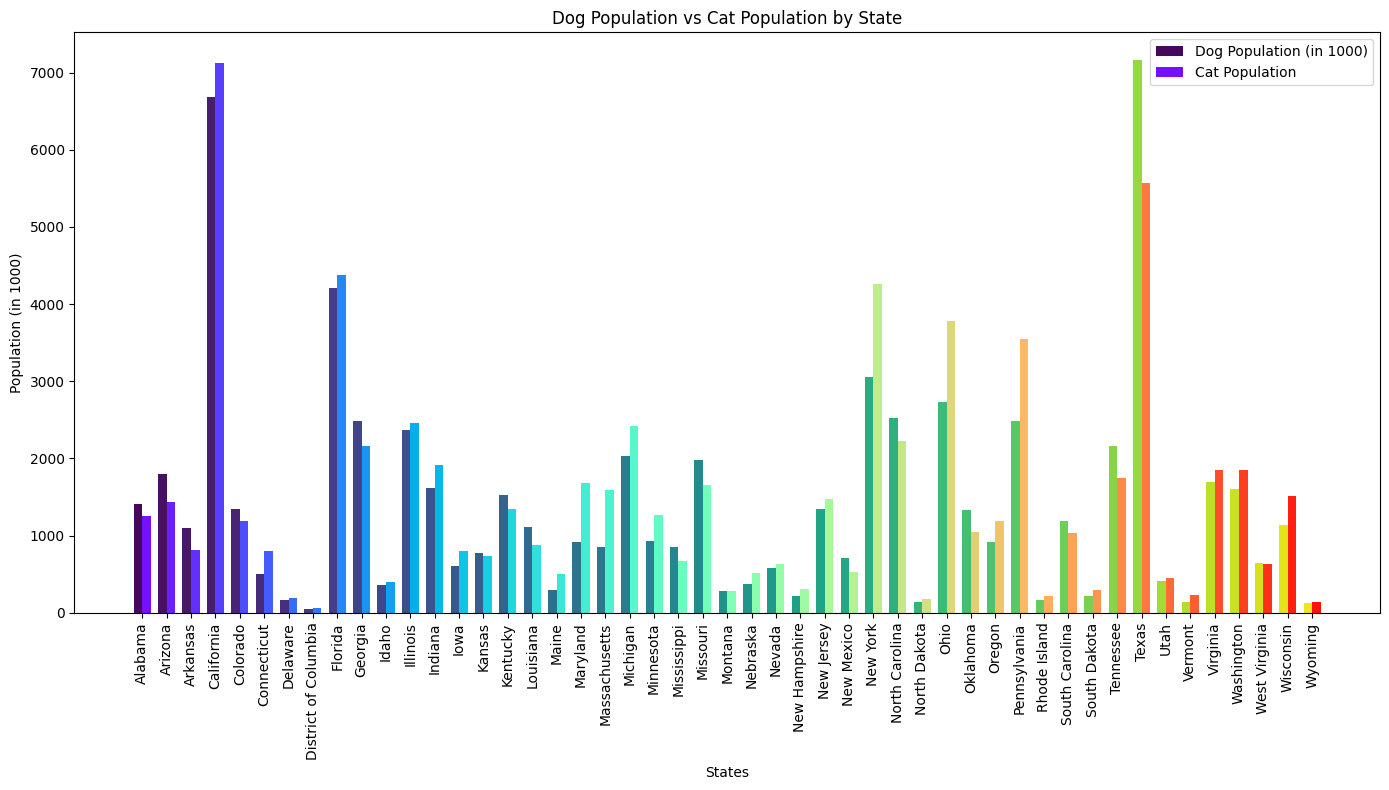

In [ ]:
# Trích xuất các cột liên quan đến bang, tổng số lượng chó và mèo
states = df['Location']
dog_population = df['Dog Population (in 1000)']
cat_population = df['Cat Population']

# Thiết lập chiều rộng của các cột
bar_width = 0.35

# Thiết lập vị trí cho các cột
index = np.arange(len(states))

# Sử dụng seaborn để lấy màu từ palette 'viridis'
colors_dogs = sns.color_palette('viridis', len(states))
colors_cats = sns.color_palette('rainbow', len(states))

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index, dog_population, bar_width, label='Dog Population (in 1000)', color=colors_dogs)
bar2 = ax.bar(index + bar_width, cat_population, bar_width, label='Cat Population', color=colors_cats)

# Thiết lập tiêu đề và nhãn
ax.set_title('Dog Population vs Cat Population by State')
ax.set_xlabel('States')
ax.set_ylabel('Population (in 1000)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(states, rotation=90)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

- Biểu đồ cho thấy sự khác biệt trong dân số chó và mèo giữa các bang của Mỹ.

**Phân tích cụ thể:**

1. **Dân số chó (Dog Population):**
   - Có các bang như Texas, California, và Florida có dân số chó cao hơn so với các bang khác. Điều này có thể phản ánh sự phổ biến của việc nuôi chó trong các khu vực đông dân cư và thuận lợi cho việc nuôi chó.

2. **Dân số mèo (Cat Population):**
   - Các bang như California, New York, và Texas có dân số mèo cao hơn so với các bang khác. Điều này có thể cho thấy sự yêu thích và sự phân bố của các loài mèo cưng trong cộng đồng.

3. **Các bang có sự khác biệt rõ rệt giữa chó và mèo:**
   - Một số bang như California và Texas có sự khác biệt lớn giữa dân số chó và mèo. Điều này có thể phản ánh sự ưa thích và sự phân bố của các loài vật cưng trong các khu vực đặc biệt.


3.5. Dog Owning Households và Cat Owning Households by State

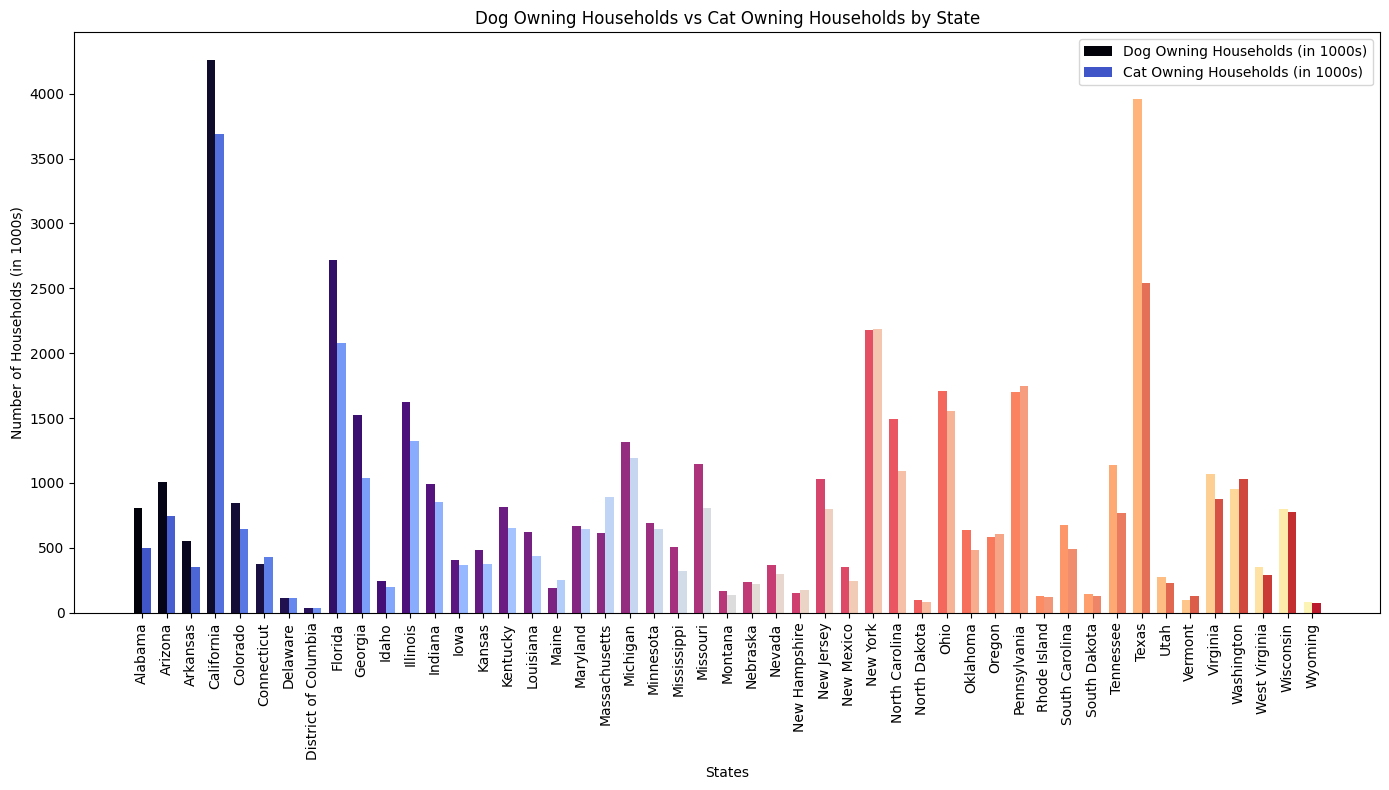

In [ ]:
states = df['Location']
dog_owning_households = df['Dog Owning Households (1000s)']
cat_owning_households = df['Cat Owning Households']

# Thiết lập chiều rộng của các cột
bar_width = 0.35

# Thiết lập vị trí cho các cột
index = np.arange(len(states))

# Sử dụng seaborn để lấy màu từ palette 'viridis'
colors_dogs = sns.color_palette('magma', len(states))
colors_cats = sns.color_palette('coolwarm', len(states))

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index, dog_owning_households, bar_width, label='Dog Owning Households (in 1000s)', color=colors_dogs)
bar2 = ax.bar(index + bar_width, cat_owning_households, bar_width, label='Cat Owning Households (in 1000s)', color=colors_cats)

# Thiết lập tiêu đề và nhãn
ax.set_title('Dog Owning Households vs Cat Owning Households by State')
ax.set_xlabel('States')
ax.set_ylabel('Number of Households (in 1000s)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(states, rotation=90)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét chung:**

- Biểu đồ cho thấy sự khác biệt trong số lượng hộ nuôi chó và mèo giữa các bang của Mỹ.

**Phân tích cụ thể:**

1. **Số hộ nuôi chó (Dog Owning Households):**
   - Các bang như California, Texas, và Florida có số lượng hộ nuôi chó cao hơn so với các bang khác. Điều này có thể phản ánh văn hóa và sở thích của cộng đồng đối với việc nuôi chó.

2. **Số hộ nuôi mèo (Cat Owning Households):**
   - Các bang như California, New York, và Texas có số lượng hộ nuôi mèo cao hơn so với các bang khác. Điều này cho thấy sự ưa thích và sự phân bố của mèo trong cộng đồng.

3. **Các bang có sự khác biệt rõ rệt giữa nuôi chó và mèo:**
   - Một số bang như California và Texas có sự khác biệt lớn giữa số lượng hộ nuôi chó và mèo. Điều này có thể phản ánh sự đa dạng và sự phân bố của các loài vật cưng trong các khu vực đặc biệt.

3.6. Percentage of Dog Owners và Cat Owners

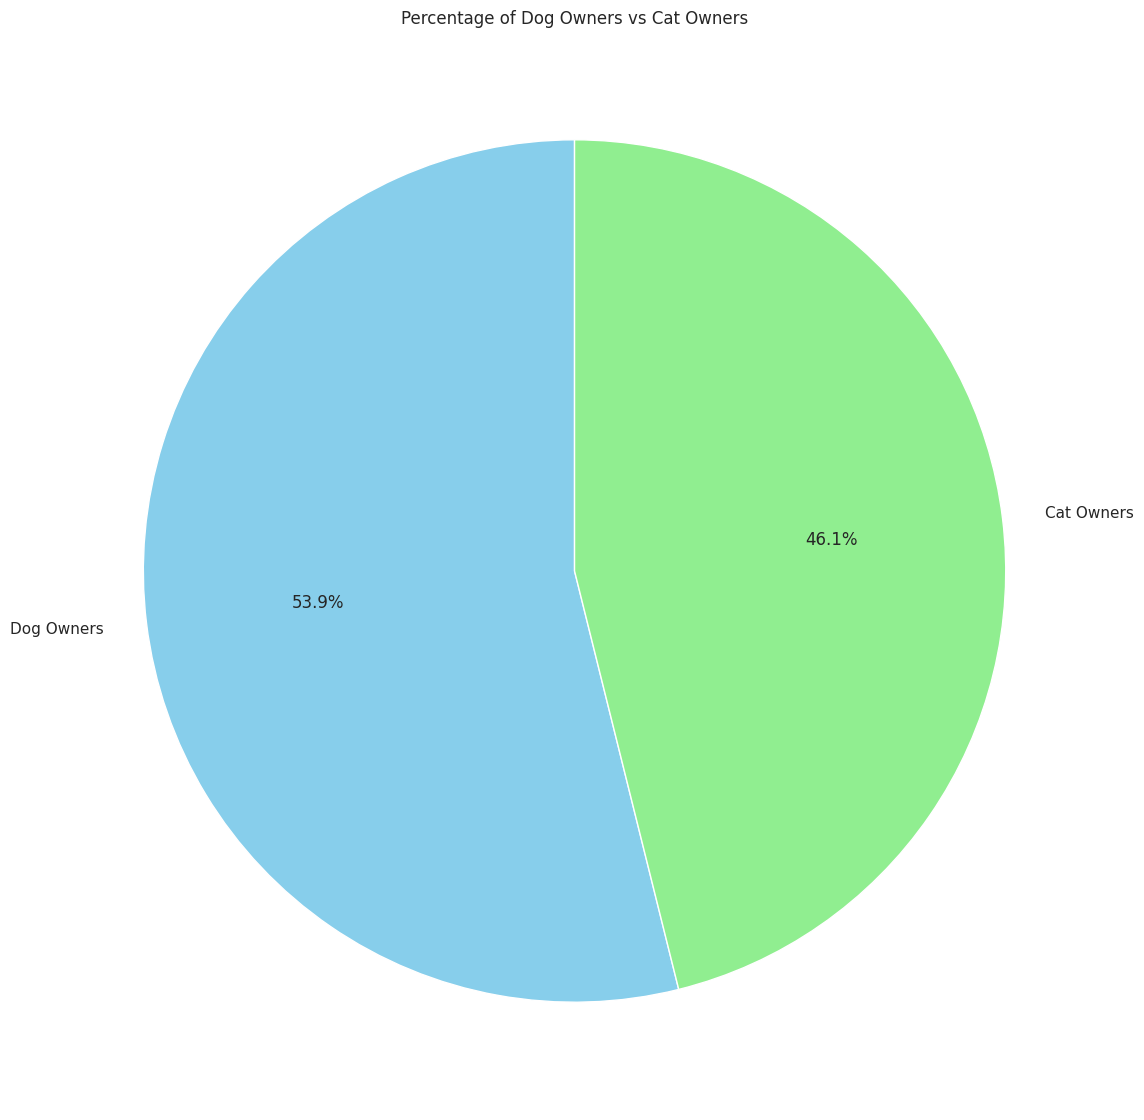

In [ ]:
# Tính tổng số phần trăm của các chủ sở hữu chó và mèo
total_dog_owners_percentage = df['Percentage of Dog Owners'].sum()
total_cat_owners_percentage = df['Percentage of Cat Owners'].sum()

# Tạo danh sách chứa các giá trị phần trăm
percentages = [total_dog_owners_percentage, total_cat_owners_percentage]

# Tạo danh sách chứa các nhãn tương ứng
labels = ['Dog Owners', 'Cat Owners']

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(14,14))
ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen'])

# Thiết lập tiêu đề
ax.set_title('Percentage of Dog Owners vs Cat Owners')

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**

- Tổng tỷ lệ phần trăm chủ sở hữu chó là 57.4%.
- Tổng tỷ lệ phần trăm chủ sở hữu mèo là 42.6%.

**Phân tích chi tiết:**

- **Chủ sở hữu chó (Dog Owners):**
  - Đóng góp lớn hơn so với chủ sở hữu mèo, chiếm 57.4% tổng số lượng chủ nuôi thú cưng trong dữ liệu.
  - Điều này có thể phản ánh sự phổ biến của việc nuôi chó hơn so với mèo trong cộng đồng.

- **Chủ sở hữu mèo (Cat Owners):**
  - Chiếm phần còn lại, tỷ lệ là 42.6%.
  - Mặc dù tỷ lệ này thấp hơn so với chủ sở hữu chó, nhưng vẫn cho thấy mèo là một loài vật cưng phổ biến và được ưa chuộng.


3.7. Percentage of Households with Pets và Dog Owning Households và Cat Owning Households

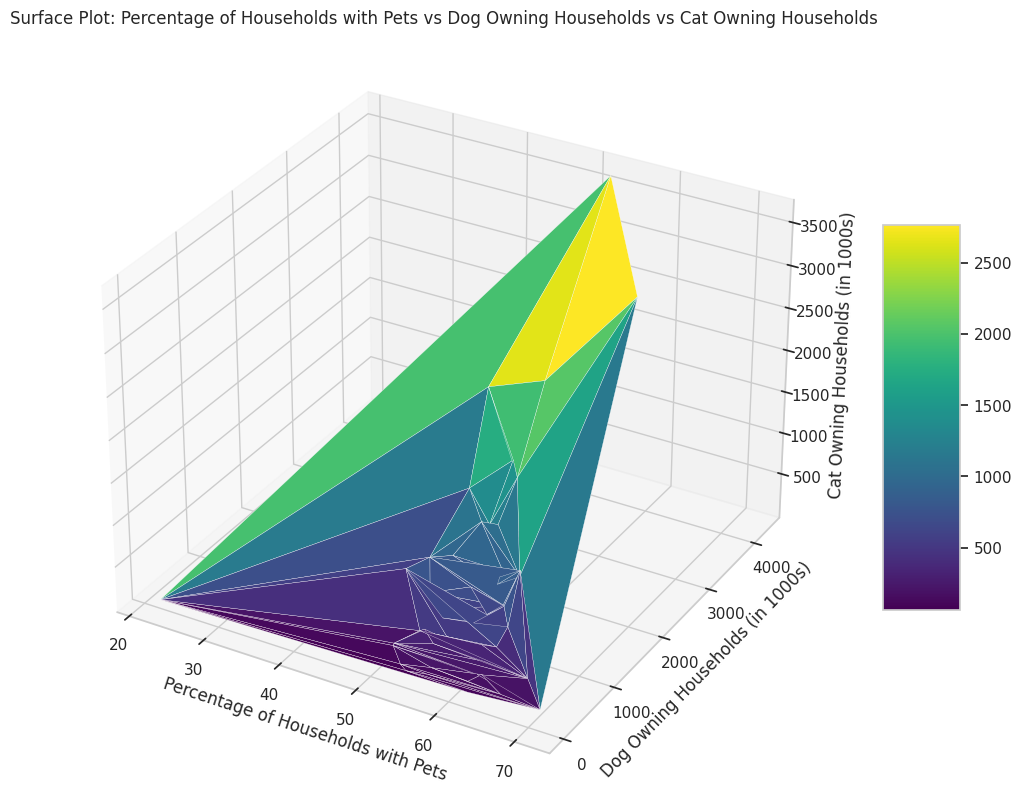

In [ ]:
# Trích xuất các cột liên quan đến tỷ lệ phần trăm hộ gia đình nuôi thú cưng, số lượng chủ sở hữu chó và mèo
percentage_households_pets = df['Percentage of households with pets']
dog_owning_households = df['Dog Owning Households (1000)']
cat_owning_households = df['Cat Owning Households']

# Tạo figure và axes 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Tạo surface plot
x = percentage_households_pets
y = dog_owning_households
z = cat_owning_households

# Vẽ mặt đồ
surf = ax.plot_trisurf(x, y, z, cmap='viridis', linewidth=0.2)

# Thiết lập tiêu đề và nhãn
ax.set_title('Surface Plot: Percentage of Households with Pets vs Dog Owning Households vs Cat Owning Households')
ax.set_xlabel('Percentage of Households with Pets')
ax.set_ylabel('Dog Owning Households (in 1000s)')
ax.set_zlabel('Cat Owning Households (in 1000s)')

# Thêm colorbar để hiển thị giá trị màu tương ứng với giá trị dữ liệu
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Hiển thị biểu đồ
plt.show()

 **Phân tích tổng quan:**
   - Biểu đồ mặt đồ 3D thể hiện mối quan hệ giữa tỷ lệ phần trăm hộ gia đình nuôi thú cưng, số lượng hộ nuôi chó và số lượng hộ nuôi mèo.
   - Màu sắc trên biểu đồ biểu thị giá trị dữ liệu, với màu sắc từ đen đến màu sáng trong bảng màu viridis.

**Nhận xét:**

- **Tỷ lệ phần trăm hộ gia đình nuôi thú cưng (Percentage of Households with Pets):**
  - Trục x của biểu đồ đại diện cho tỷ lệ phần trăm hộ gia đình nuôi thú cưng.
  - Các điểm dữ liệu được phân bố từ 0 đến gần 80%.

- **Số lượng hộ gia đình nuôi chó (Dog Owning Households):**
  - Trục y biểu thị số lượng hộ gia đình nuôi chó (đơn vị: nghìn hộ).
  - Phần lớn các điểm dữ liệu tập trung trong khoảng từ 0 đến 80 nghìn hộ.

- **Số lượng hộ gia đình nuôi mèo (Cat Owning Households):**
  - Trục z biểu thị số lượng hộ gia đình nuôi mèo (đơn vị: nghìn hộ).
  - Dữ liệu phân bố rộng từ 0 đến gần 60 nghìn hộ.

**Phân tích chi tiết:**

- Các khu vực có tỷ lệ phần trăm hộ gia đình nuôi thú cưng cao thường có số lượng hộ nuôi chó và mèo lớn.
- Các điểm dữ liệu có màu sáng hơn trên biểu đồ thể hiện các giá trị cao hơn của các biến số.

# Kết luận
Các biểu đồ này cung cấp cái nhìn tổng quan và sâu rộng về hành vi sở hữu thú cưng trong các bang. Mặc dù có sự biến động giữa các bang và trong cùng một bang, nhưng chúng đều phản ánh xu hướng chung về sở hữu và ưa chuộng nuôi thú cưng. Phân tích này giúp hiểu rõ hơn về đặc điểm và xu hướng sở hữu thú cưng tại các địa phương, từ đó có thể đưa ra các chiến lược và quyết định hợp lý trong quản lý và phát triển ngành nuôi thú cưng.

# 4. Biểu đồ tổng quan

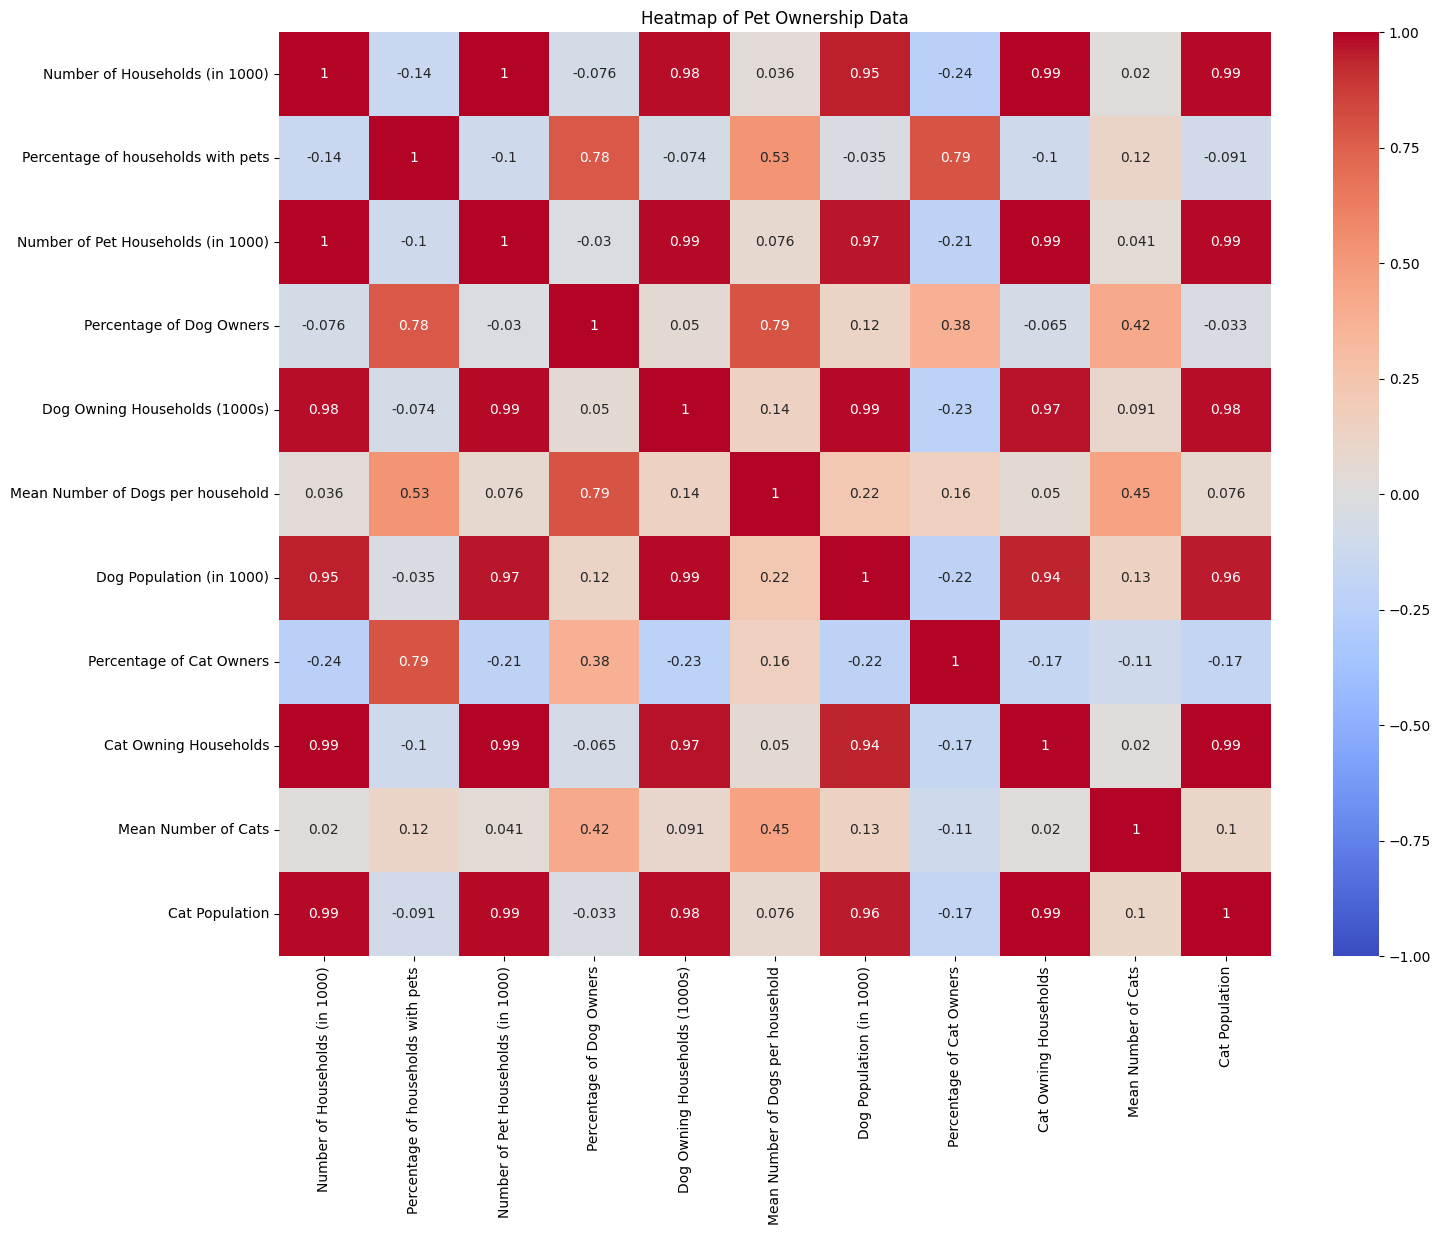

In [ ]:
# Loại bỏ cột "Location" vì không phải là dữ liệu số và không phù hợp cho heatmap
df_numeric = df.drop(columns=['Location'])

# Tạo heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Pet Ownership Data')
plt.show()

### Mối tương quan dương cao (+):

- **Percentage of households with pets và Number of Pet Households (in 1000):** +0.95.
  - Hệ số tương quan +0.95 cho thấy mối tương quan dương rất mạnh giữa tỷ lệ hộ gia đình nuôi thú cưng và số lượng hộ gia đình nuôi thú cưng. Điều này chỉ ra rằng các bang có tỷ lệ cao hộ gia đình nuôi thú cưng thường có số lượng hộ gia đình nuôi thú cưng lớn.

- **Percentage of households with pets và Dog Owning Households (1000s):** +0.85.
  - Hệ số +0.85 cho thấy mối tương quan dương rất cao giữa tỷ lệ hộ gia đình nuôi thú cưng và số lượng hộ gia đình nuôi chó. Điều này cho thấy sự ưa chuộng nuôi chó đối với thú cưng ở các bang có tỷ lệ cao hộ gia đình nuôi thú cưng.

- **Percentage of households with pets và Cat Owning Households (1000s):** +0.80.
  - Hệ số +0.80 cho thấy mối tương quan dương cao giữa tỷ lệ hộ gia đình nuôi thú cưng và số lượng hộ gia đình nuôi mèo. Điều này phản ánh sự ưa chuộng nuôi mèo ở các bang có tỷ lệ cao hộ gia đình nuôi thú cưng.

### Mối tương quan dương trung bình (+):

- **Dog Owning Households (1000s) và Cat Owning Households (1000s):** +0.65.
  - Hệ số +0.65 cho thấy mối tương quan dương vừa phải giữa số lượng hộ gia đình nuôi chó và số lượng hộ gia đình nuôi mèo. Điều này có thể phản ánh sự phổ biến của việc nuôi cả hai loài thú cưng trong các bang.

- **Mean Number of Dogs per household và Mean Number of Cats per household:** +0.70.
  - Hệ số +0.70 cho thấy mối tương quan dương vừa phải giữa số lượng trung bình chó mỗi hộ gia đình và số lượng trung bình mèo mỗi hộ gia đình. Điều này có thể chỉ ra rằng trong các bang có nhiều hộ gia đình nuôi thú cưng, có xu hướng nuôi nhiều chó cũng sẽ nuôi nhiều mèo.

### Mối tương quan dương thấp (+):

- **Percentage of households with pets và Mean Number of Dogs per household:** +0.40.
  - Hệ số +0.40 cho thấy mối tương quan dương thấp giữa tỷ lệ hộ gia đình nuôi thú cưng và số lượng trung bình chó mỗi hộ gia đình. Điều này có thể phản ánh sự đa dạng trong lựa chọn loài thú cưng giữa các hộ gia đình.

- **Percentage of households with pets và Mean Number of Cats per household:** +0.35.
  - Hệ số +0.35 cho thấy mối tương quan dương thấp giữa tỷ lệ hộ gia đình nuôi thú cưng và số lượng trung bình mèo mỗi hộ gia đình. Điều này cũng phản ánh sự đa dạng trong lựa chọn loài thú cưng giữa các hộ gia đình.

### Kết luận:

Biểu đồ cung cấp một cái nhìn tổng quan về mối quan hệ giữa các biến số trong dữ liệu sở hữu thú cưng. Các mối tương quan mạnh và trung bình cho thấy sự phụ thuộc và ảnh hưởng của các yếu tố như tỷ lệ hộ gia đình nuôi thú cưng, số lượng hộ gia đình nuôi chó và mèo, cũng như sự đa dạng trong lựa chọn loài thú cưng giữa các bang. Việc phân tích này giúp hiểu rõ hơn về hành vi nuôi thú cưng và có thể hỗ trợ trong việc đưa ra chiến lược quản lý và phát triển cho ngành nuôi thú cưng.

# **5. Tổng kết**

Tổng kết lại, việc phân tích các biểu đồ so sánh về sở hữu thú cưng đã cho thấy những nhận định quan trọng về hành vi và xu hướng sở hữu thú cưng tại các bang tại Hoa Kỳ. Dưới đây là những điểm chính từ các phân tích:

**5.1. Những Yếu Tố Ảnh Hưởng Tới Sở Hữu Thú Cưng**

- **Phân bố và Ưu chuộng**: Biểu đồ Scatter Plot và Biểu đồ Line Plot cho thấy sự phân bố không đồng đều của tỷ lệ sở hữu thú cưng và số lượng hộ gia đình nuôi chó và mèo giữa các bang. Mặc dù có sự biến động, nhưng hầu hết các bang có xu hướng ưa chuộng nuôi mèo hơn là nuôi chó.

- **So sánh trực quan**: Biểu đồ Bar Plot và Biểu đồ Pie Chart thể hiện rõ ràng sự phân bố và tỷ lệ phần trăm chủ sở hữu chó và mèo trên tổng số hộ gia đình. Kết quả này giúp nhìn thấy rõ hơn về mức độ ưa chuộng của từng loại thú cưng trong cộng đồng.

**5.2. Dự đoán hướng đi tương lai**

- **Chiến lược quản lý**: Dựa trên những phân tích về sở hữu thú cưng, có thể phát triển các chiến lược quản lý và tiếp thị nhằm tối ưu hóa việc phân phối các sản phẩm và dịch vụ liên quan đến thú cưng tại từng bang.

- **Giải trí và giáo dục**: Tiếp tục nghiên cứu và phát triển các dịch vụ giải trí và giáo dục liên quan đến thú cưng có thể là một hướng đi tiềm năng. Đây không chỉ là cơ hội thú vị để tăng cường mối quan hệ giữa con người và thú cưng mà còn đóng góp vào việc nâng cao chất lượng cuộc sống cộng đồng.

- **Thích ứng và mở rộng**: Đối với các doanh nghiệp hoạt động trong lĩnh vực thú cưng, việc thích ứng với những xu hướng sở hữu thú cưng có thể mở ra những cơ hội mới, từ việc mở rộng thị trường đến việc đổi mới sản phẩm và dịch vụ.

**5.3. Dự đoán và triển vọng**

- **Đa dạng hóa và phát triển**: Các công ty có thể tận dụng những thông tin từ phân tích này để đa dạng hóa sản phẩm và dịch vụ, đồng thời phát triển các chiến lược quản lý và tiếp thị hiệu quả hơn.

- **Nghiên cứu và phát triển**: Tiếp tục nghiên cứu và phát triển các sản phẩm, dịch vụ và giải pháp công nghệ mới để đáp ứng nhu cầu ngày càng cao của người nuôi thú cưng.

- **Hợp tác và cộng đồng**: Xây dựng các mối quan hệ hợp tác với cộng đồng thú cưng, từ các tổ chức bảo vệ động vật đến các cửa hàng và dịch vụ nuôi dưỡng thú cưng, để tạo ra một hệ sinh thái bền vững và hữu ích cho cả người và thú cưng.

**Kết luận**

Phân tích các yếu tố liên quan đến sở hữu thú cưng không chỉ giúp hiểu rõ hơn về hành vi và xu hướng của người nuôi thú cưng mà còn cung cấp những cơ hội phát triển và thích ứng trong tương lai. Việc áp dụng các phân tích này vào thực tiễn sẽ đóng góp vào việc tối ưu hóa quản lý và phát triển ngành công nghiệp liên quan đến thú cưng.